# Preinstallation

## Install libs

In [61]:
!pip install tensorflowjs

    100% |████████████████████████████████| 80.3MB 407kB/s 
    100% |████████████████████████████████| 13.9MB 3.5MB/s 
    100% |████████████████████████████████| 61kB 23.4MB/s 
    100% |████████████████████████████████| 3.0MB 7.1MB/s 
    100% |████████████████████████████████| 358kB 18.5MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [2]:
#!pip install eli5

    100% |████████████████████████████████| 102kB 2.6MB/s 


In [3]:
#!pip install plotly --upgrade

    100% |████████████████████████████████| 35.7MB 951kB/s 
  Found existing installation: plotly 3.6.1
    Uninstalling plotly-3.6.1:
      Successfully uninstalled plotly-3.6.1


In [4]:
#!pip install clint

  Stored in directory: /root/.cache/pip/wheels/4f/e9/45/223565e5b1a4b09e12c6de6f8ba7c2c0e9127dec17cf830f83
  Stored in directory: /root/.cache/pip/wheels/58/54/ea/d995d18af68c057eb76b87b02c92bc66ac34d360ef141780f4
Successfully built clint args


In [5]:
#!pip install utils

Fix for 'title' has invalid value inside 'layout'

## Import

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.measure import compare_ssim as ssim
import skimage
import tarfile
import sklearn.utils
import sklearn as skl
import IPython.display as ipd
import requests
import sys
import zipfile
import pandas as pd
import ast
import librosa
import librosa.display
from PIL import Image
import numpy as np
from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
from time import time
import IPython
import xgboost as xgb
import scipy as sc
from keras import models, layers, optimizers, utils, losses, regularizers, callbacks
import tensorflow as tf
import csv
import google.colab as gc
import seaborn as sns
import itertools
import concurrent
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
#import tensorflowjs as tfjs

Using TensorFlow backend.


## Help functions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
fma_data_file = '/content/drive/My Drive/fma_v3.csv'
gtzan_data_file = '/content/drive/My Drive/gtzan_pub.csv'
upload_data_file = '/content/drive/My Drive/upload_pub.csv'
fma_music_dir = 'fma_small'
gtzan_music_dir = 'gtzan'
tfjs_target_dir = 'tfjs_model'

In [0]:
np.random.seed(42)
tf.set_random_seed(42)

In [5]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

#IPython.get_ipython().events.unregister('pre_run_cell', configure_plotly_browser_state)
init_notebook_mode(connected=True)

In [0]:
def download(url, filename):
    with open(filename, 'wb') as f:
        response = requests.get(url, stream=True)
        total = response.headers.get('content-length')

        if total is None:
            f.write(response.content)
        else:
            sys.stdout.write('Downloading {} of size {} from {}\n'.format(
                filename, total, url))
            downloaded = 0
            total = int(total)
            for data in response.iter_content(chunk_size=max(int(total/1000), 1024*1024)):
                downloaded += len(data)
                f.write(data)
                done = int(50*downloaded/total)
                sys.stdout.write('\r[{}{}]'.format('█' * done, '.' * (50-done)))
                sys.stdout.flush()
    sys.stdout.write('\nDone\n')

In [0]:
def load(filepath):

    filename = os.path.basename(filepath)

    if 'features' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'echonest' in filename:
        return pd.read_csv(filepath, index_col=0, header=[0, 1, 2])

    if 'genres' in filename:
        return pd.read_csv(filepath, index_col=0)

    if 'tracks' in filename:
        tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])

        COLUMNS = [('track', 'tags'), ('album', 'tags'), ('artist', 'tags'),
                   ('track', 'genres'), ('track', 'genres_all')]
        for column in COLUMNS:
            tracks[column] = tracks[column].map(ast.literal_eval)

        COLUMNS = [('track', 'date_created'), ('track', 'date_recorded'),
                   ('album', 'date_created'), ('album', 'date_released'),
                   ('artist', 'date_created'), ('artist', 'active_year_begin'),
                   ('artist', 'active_year_end')]
        for column in COLUMNS:
            tracks[column] = pd.to_datetime(tracks[column])

        SUBSETS = ('small', 'medium', 'large')
        tracks['set', 'subset'] = tracks['set', 'subset'].astype(
                'category', categories=SUBSETS, ordered=True)

        COLUMNS = [('track', 'genre_top'), ('track', 'license'),
                   ('album', 'type'), ('album', 'information'),
                   ('artist', 'bio')]
        for column in COLUMNS:
            tracks[column] = tracks[column].astype('category')

        return tracks

In [0]:
def plot_history(history, title=''):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy ' + title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Download FMA

In [0]:
download('https://os.unil.cloud.switch.ch/fma/fma_metadata.zip', 'fma_metadata.zip')
with zipfile.ZipFile('fma_metadata.zip', 'r') as zip_ref:
    zip_ref.extractall('')

[██████████████████████████████████████████████████]
Done


In [0]:
download('https://os.unil.cloud.switch.ch/fma/fma_small.zip', fma_music_dir + '.zip')

[██████████████████████████████████████████████████]
Done


In [0]:
with zipfile.ZipFile(fma_music_dir + '.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [0]:
tracks = load('fma_metadata/tracks.csv')
genres = load('fma_metadata/genres.csv')
#features = load('fma_metadata/features.csv')
#echonest = load('fma_metadata/echonest.csv')

tracks_data = tracks['track']

tracks.shape, genres.shape#, features.shape, echonest.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: FutureWarning:

specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead



((106574, 52), (163, 4))

# Download GTZAN

In [0]:
download('http://opihi.cs.uvic.ca/sound/genres.tar.gz', 'gtzan.tar.gz')

[██████████████████████████████████████████████████]
Done


In [0]:
file = tarfile.open('gtzan.tar.gz', 'r:gz')
file.extractall(gtzan_music_dir)
file.close()

In [0]:
gtzan_genres = np.array(['blues', 'classical', 'country', 'disco', 'hiphop',
                        'jazz', 'metal', 'pop', 'reggae', 'rock'])
gtzan_genres.shape

(10,)

# Feature extraction

## Implementation

In [0]:
def extract_info(audio_fpath, audio_fname):
    y, sr = librosa.load(audio_fpath, sr=12000, mono=True)
    stft = np.abs(librosa.stft(y)) # np.abs(D[f, t]) is the magnitude of frequency bin f at frame t
    onset_env = librosa.onset.onset_strength(S=stft, sr=sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)[0]
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10).T, axis=0)  # 10 values
    rmse = np.mean(librosa.feature.rmse(y=y))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y, sr=sr).T, axis=0)
    spec_contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr, n_bands=4).T, axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T, axis=0) # tonal centroid features
    to_append = f'{audio_fname}'
    # print(len(mfccs), len(spec_contrast), len(chroma_stft),  len(mel),  len(tonnetz))
    for v in mfccs:
        to_append += f',{v}'
    to_append += f',{tempo},{rmse},{zcr},{rolloff},{spec_cent},{spec_bw}'
    for v in spec_contrast:
        to_append += f',{v}'
    for v in chroma_stft:
        to_append += f',{v}'
    for v in mel:
        to_append += f',{v}'
    for v in tonnetz:
        to_append += f',{v}'
    return to_append

In [0]:
def create_data_file(data_file_path, with_labels=True):
    with open(data_file_path, 'w', newline='') as data_file:
        header = 'filename'
        for i in range(10):
            header += f',mfcc{i}'
        header += ',tempo,rmse,zcr,rolloff,spec_cent,spec_bw'
        for i in range(5):
            header += f',spec_contrast{i}'
        for i in range(12):
            header += f',chroma_stft{i}'
        for i in range(128):
            header += f',mel{i}'
        for i in range(6):
            header += f',tonnetz{i}'
        if with_labels:
            header += ',label'
        header += '\n'

        with data_file:
            data_file.write(header)

In [0]:
def extract(music_dir, data_file_path, get_genre_func, processed = []):
    ok_cnt = 0
    fail_cnt = 0
    #count = 4
    #ci = 0
    
    for subdir, _, files in sorted(os.walk(music_dir)):
        for file in sorted(files):
            if file.lower().endswith('.mp3') or file.lower().endswith('.au'):
                fpath = os.path.join(subdir, file)
                fname, _ = os.path.splitext(file) # (filename, extension)
                try:
                    track_id = fname
                    if track_id in processed:
                        continue
                    genre = get_genre_func(track_id)
                    info = extract_info(fpath, fname) + f',{genre}\n'
                    # print(info)
                    with open(data_file_path, 'a', newline='') as data_file:
                        data_file.write(info)
                except Exception as e:
                    print('Fail', file, 'message', e, 'with path:', fpath)
                    fail_cnt += 1
                    continue
                ok_cnt += 1
                if ok_cnt % 100 == 0:
                    print(f'OK {ok_cnt}')
                #ci += 1
                #if ci >= count:
                    #break
            else:
                continue
        #if ci >= count:
            #break
    print('Generated {}/{}'.format(ok_cnt, ok_cnt + fail_cnt))

## FMA

In [0]:
def get_fma_genre(track_id):
    return tracks_data[tracks_data.index.isin([int(track_id)])]['genre_top'].values[0]

In [0]:
create_data_file(fma_data_file)

In [0]:
extract(fma_music_dir, fma_data_file, get_fma_genre)

## GTZAN

In [0]:
create_data_file(gtzan_data_file)

In [0]:
for genre in gtzan_genres:
    def get_gtzan_genre(track_id):
        return genre
    extract(f'{gtzan_music_dir}/genres/{genre}', gtzan_data_file, get_gtzan_genre)

OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100
OK 100
Generated 100/100


# Neural networks

## Read

### fma

In [0]:
data = pd.read_csv(fma_data_file)
data.head()

,filename,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel125,mel126,mel127,tonnetz0,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,label
0,2,-35.812378,53.031302,-7.449182,11.575685,-1.131257,9.428073,-4.696745,1.649131,-10.722289,...,0.078229,0.015685,0.000947,0.004673,0.034654,0.033464,0.123187,0.004573,0.026517,Hip-Hop
1,5,-73.338104,79.985973,11.726098,17.891997,-0.984883,9.324085,6.037658,-0.803280,-4.770171,...,0.031123,0.007458,0.000354,-0.008301,-0.012219,-0.026528,0.031785,0.007811,-0.009060,Hip-Hop
2,10,24.073470,47.650405,-23.203254,28.718546,-14.808462,12.366645,-8.726919,5.314021,-12.539311,...,0.046265,0.008090,0.000291,-0.027295,-0.036690,0.004777,-0.105232,0.011063,0.015322,Pop
3,140,-252.223063,98.682310,32.481882,41.465941,10.504709,16.019350,-1.004041,8.989655,-2.943010,...,0.001885,0.000342,0.000021,0.020107,0.022466,-0.083947,-0.019926,-0.011256,-0.010703,Folk
4,141,-173.392627,89.007860,1.862474,28.234167,-9.649516,9.381082,-9.890152,6.434683,-4.547932,...,0.009016,0.001701,0.000099,-0.006132,0.020038,-0.043906,-0.069095,0.003388,0.001462,Folk


In [0]:
data.head(5)

,filename,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel125,mel126,mel127,tonnetz0,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,label
0,2,-35.812378,53.031302,-7.449182,11.575685,-1.131257,9.428073,-4.696745,1.649131,-10.722289,...,0.078229,0.015685,0.000947,0.004673,0.034654,0.033464,0.123187,0.004573,0.026517,Hip-Hop
1,5,-73.338104,79.985973,11.726098,17.891997,-0.984883,9.324085,6.037658,-0.803280,-4.770171,...,0.031123,0.007458,0.000354,-0.008301,-0.012219,-0.026528,0.031785,0.007811,-0.009060,Hip-Hop
2,10,24.073470,47.650405,-23.203254,28.718546,-14.808462,12.366645,-8.726919,5.314021,-12.539311,...,0.046265,0.008090,0.000291,-0.027295,-0.036690,0.004777,-0.105232,0.011063,0.015322,Pop
3,140,-252.223063,98.682310,32.481882,41.465941,10.504709,16.019350,-1.004041,8.989655,-2.943010,...,0.001885,0.000342,0.000021,0.020107,0.022466,-0.083947,-0.019926,-0.011256,-0.010703,Folk
4,141,-173.392627,89.007860,1.862474,28.234167,-9.649516,9.381082,-9.890152,6.434683,-4.547932,...,0.009016,0.001701,0.000099,-0.006132,0.020038,-0.043906,-0.069095,0.003388,0.001462,Folk


In [0]:
data = data[(data.label != 'Pop') & (data.label != 'Experimental')]

In [0]:
data = data.drop('filename', axis=1)

In [0]:
data.shape

(7997, 168)

In [0]:
for i in range(128):
    if 0 < i < 10:
        continue
    data = data.drop(f'mel{i}', axis=1)
data.shape

In [0]:
# Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = skl.preprocessing.LabelEncoder()
y = encoder.fit_transform(genre_list)
y = utils.to_categorical(y)

In [0]:
scaler = skl.preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



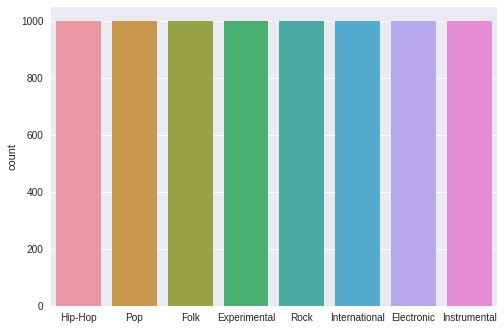

In [0]:
sns.countplot(np.array(genre_list))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



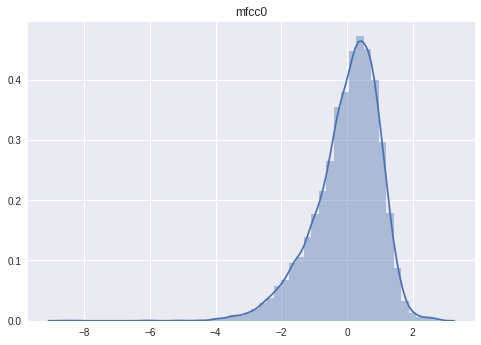

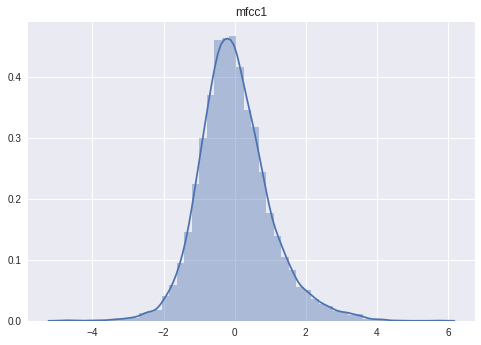

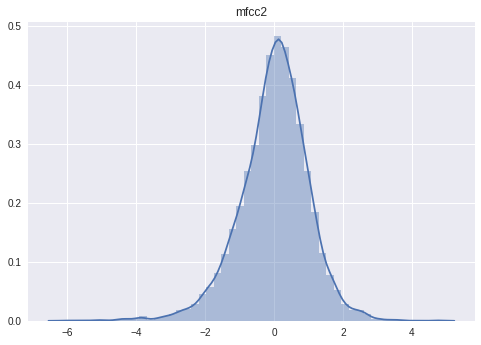

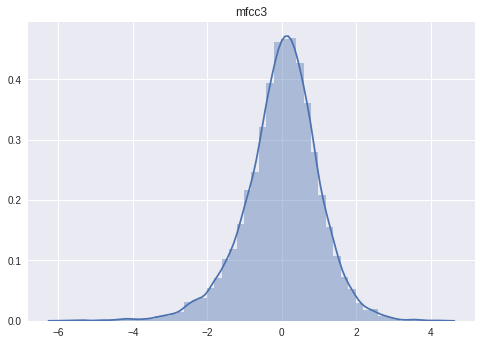

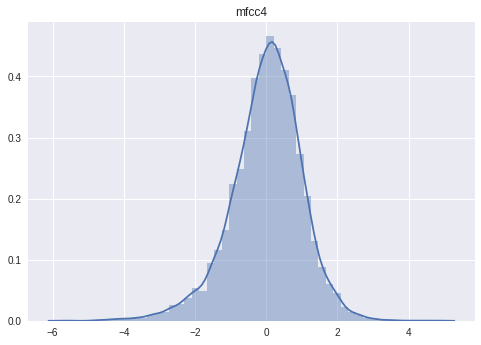

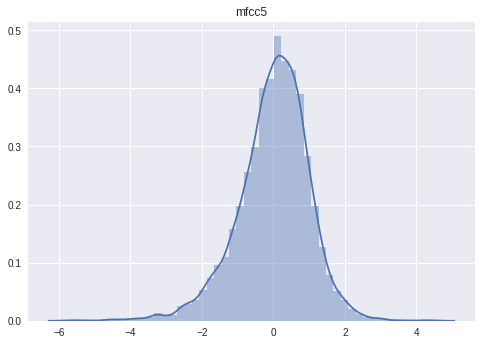

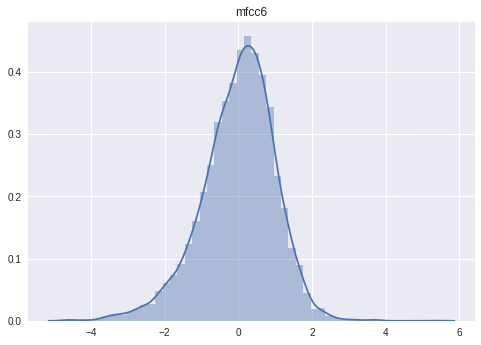

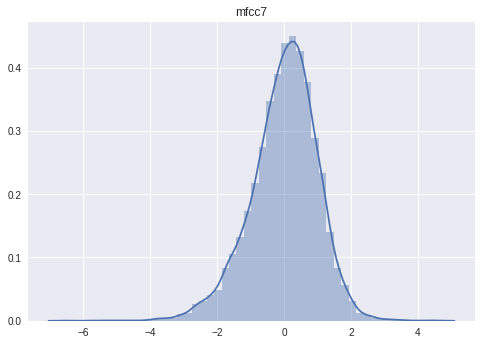

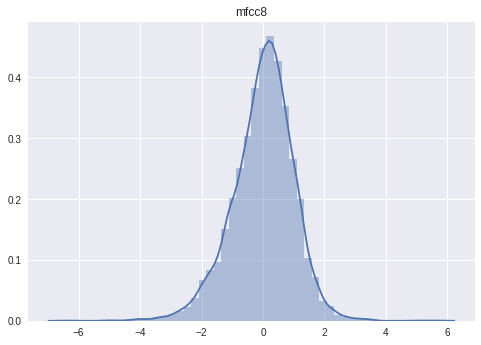

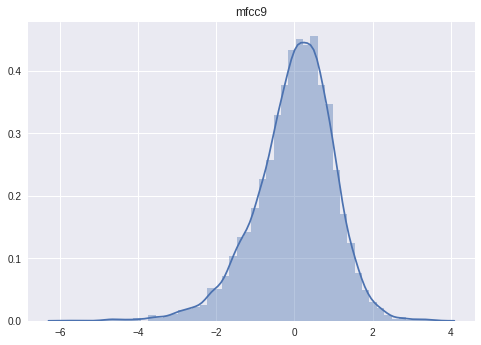

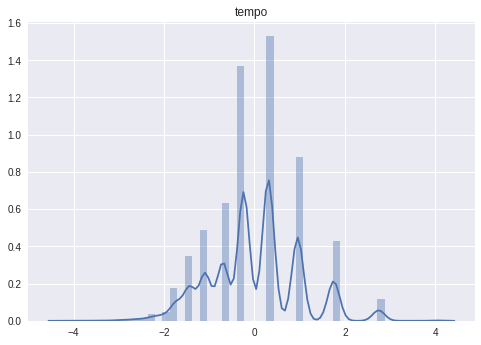

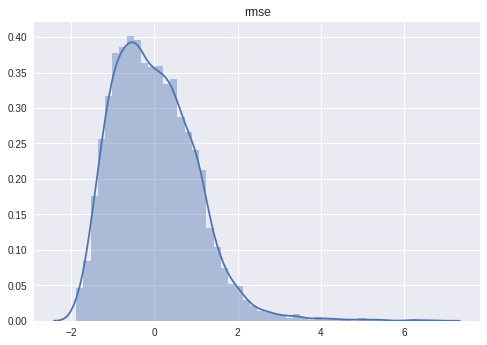

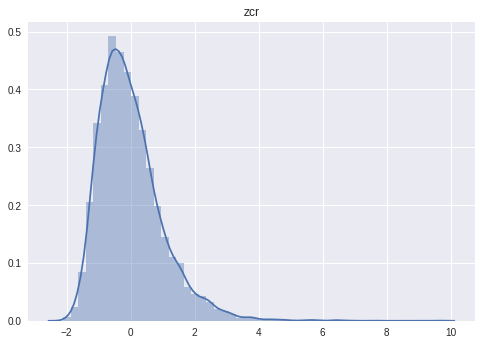

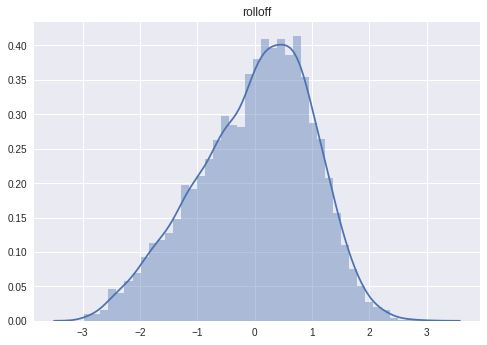

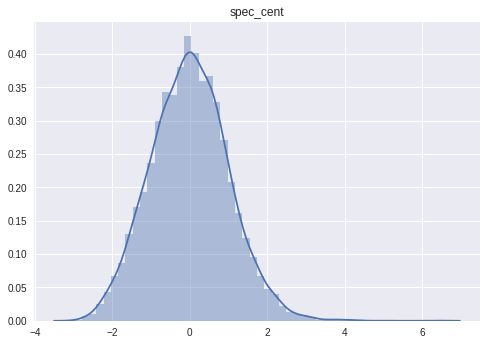

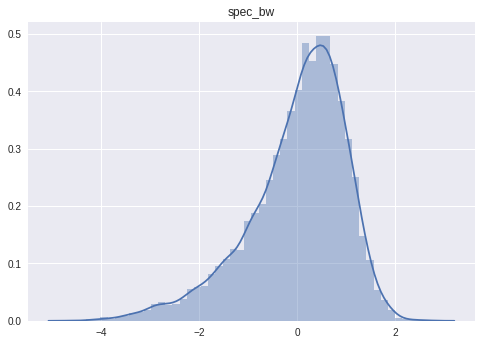

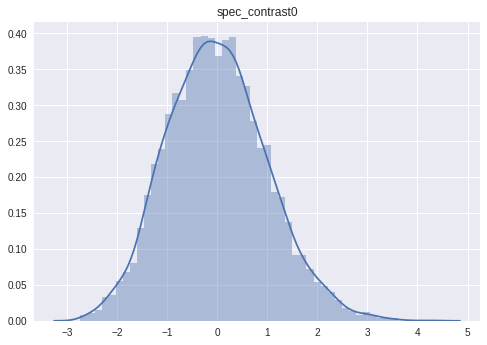

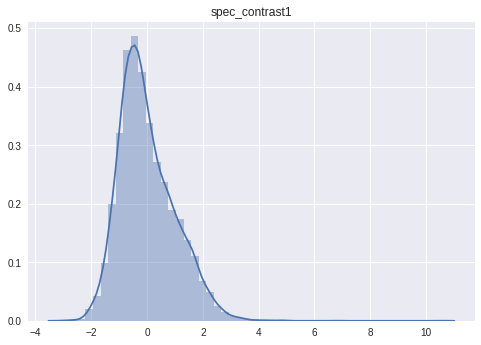

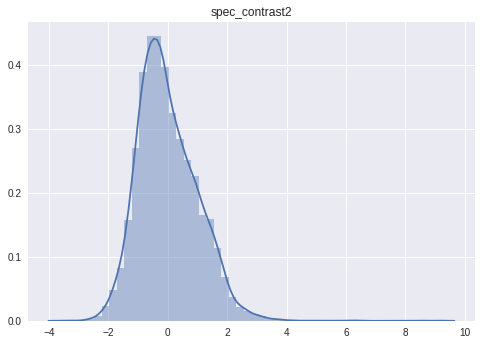

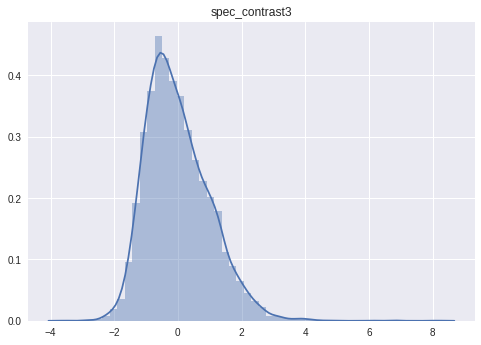

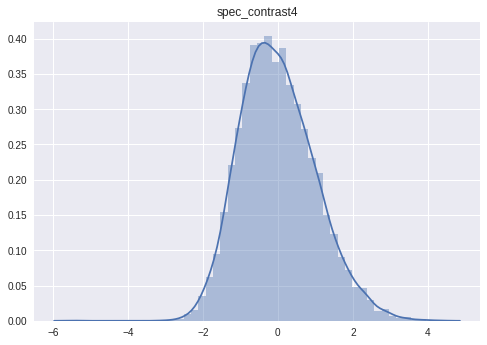

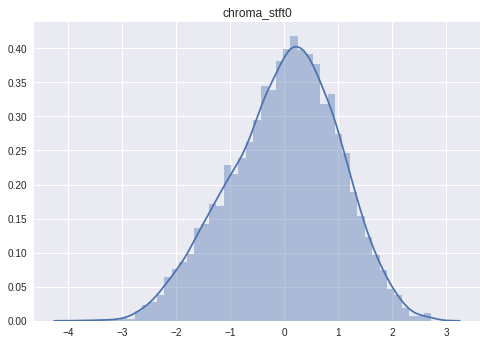

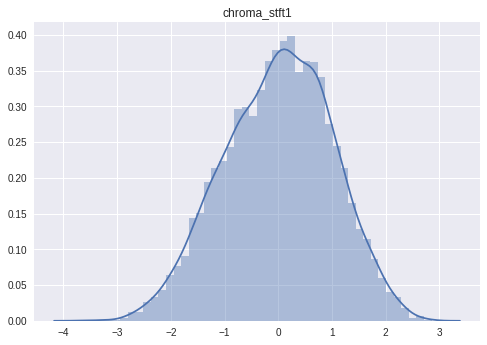

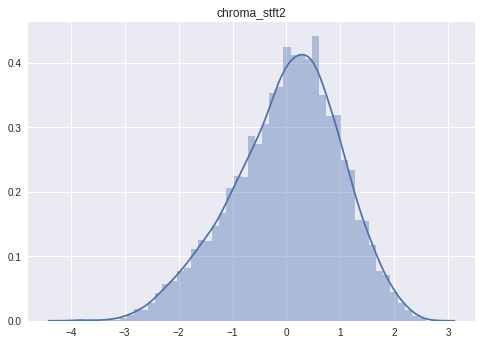

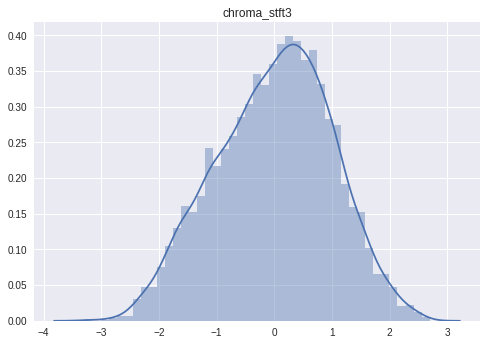

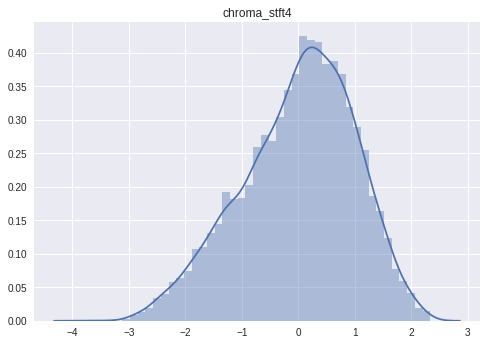

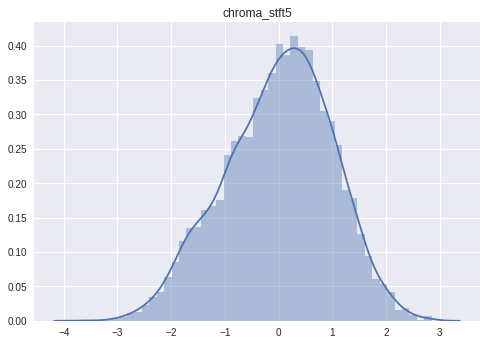

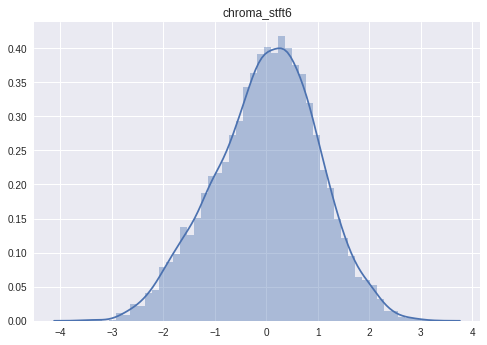

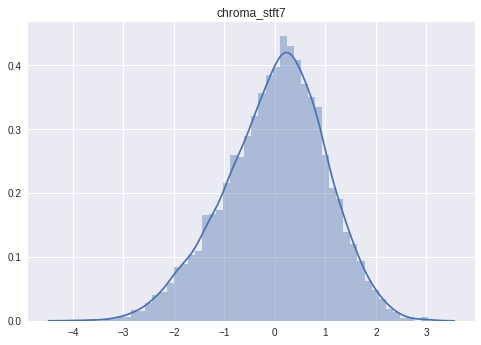

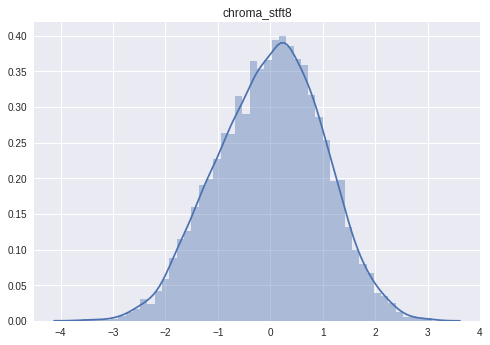

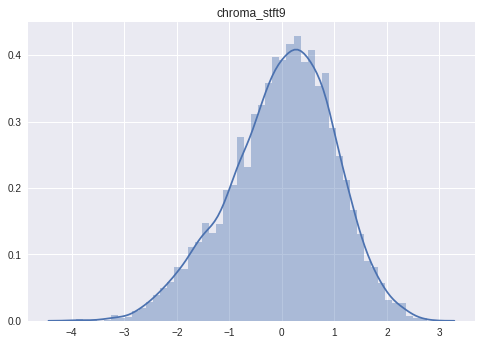

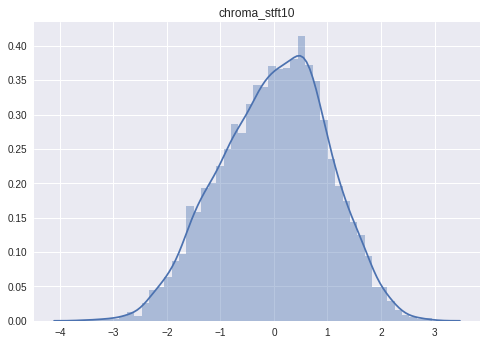

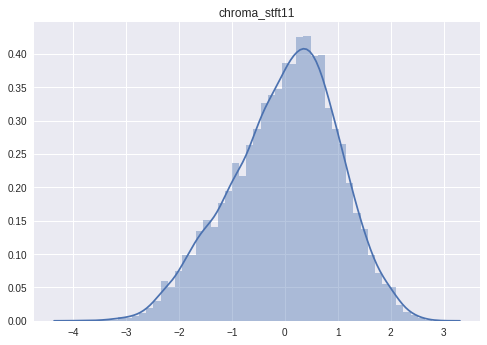

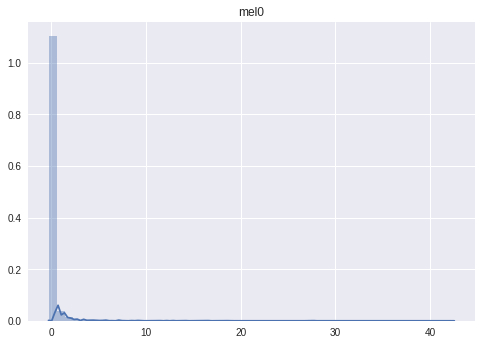

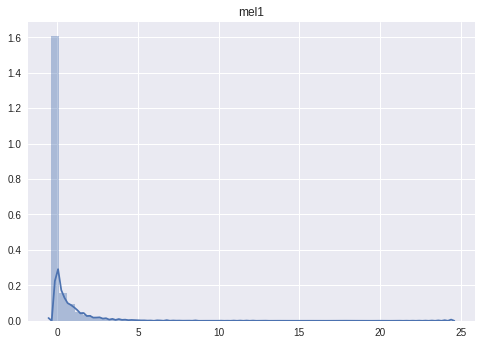

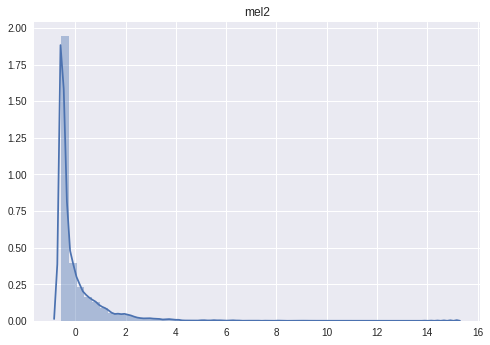

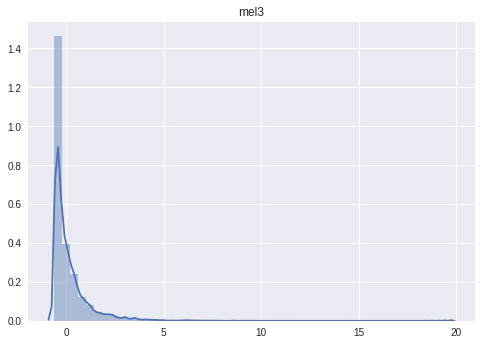

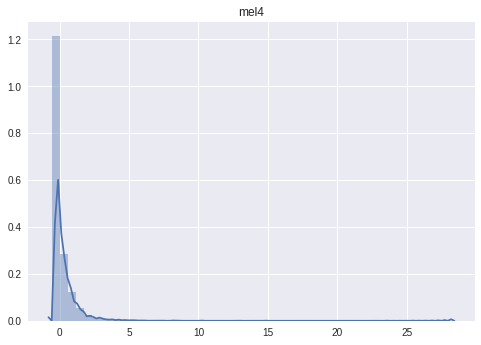

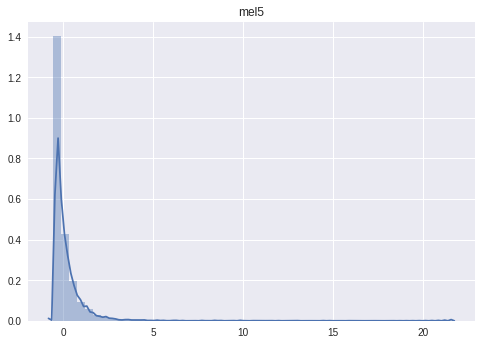

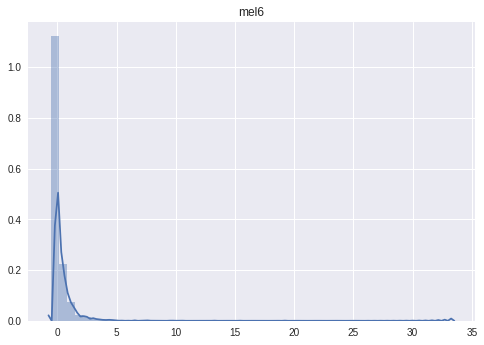

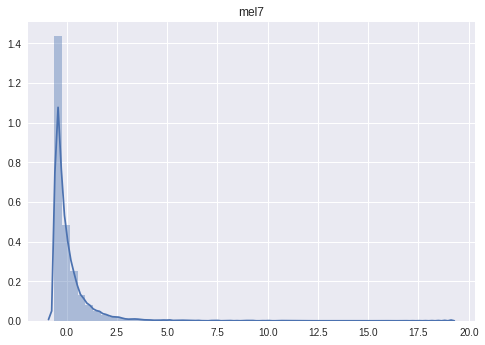

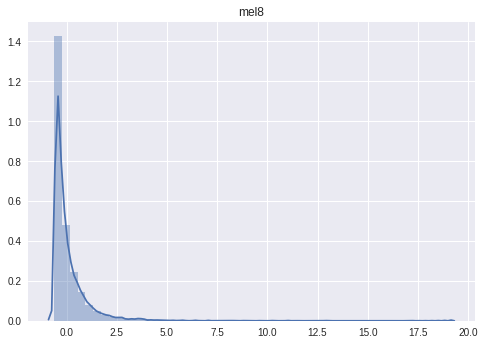

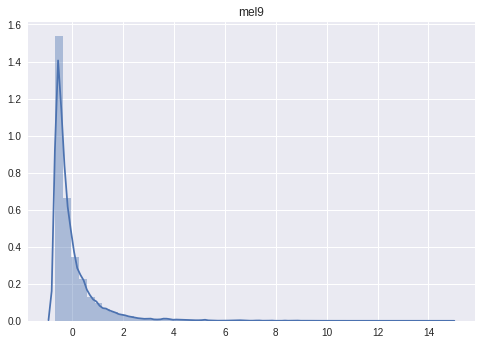

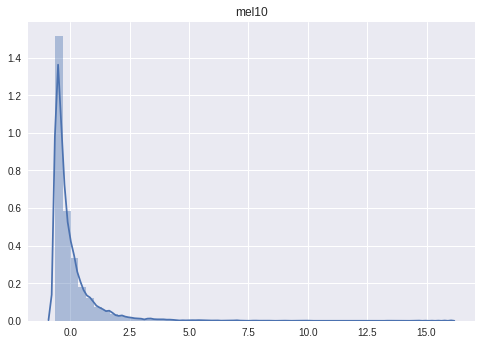

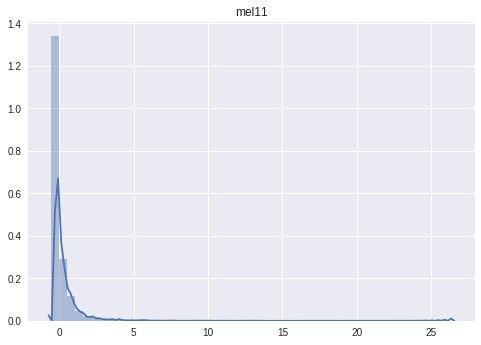

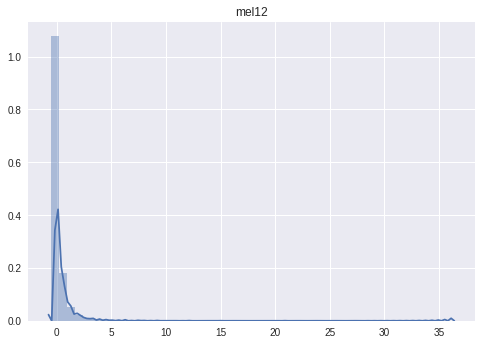

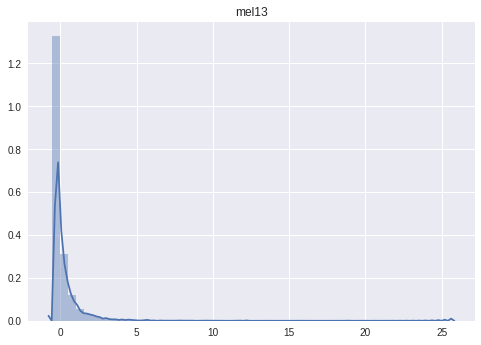

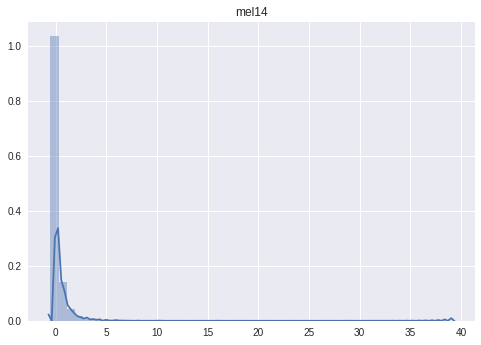

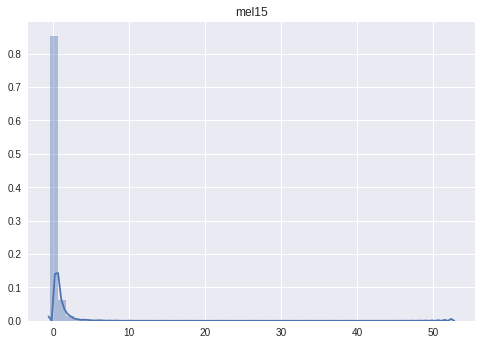

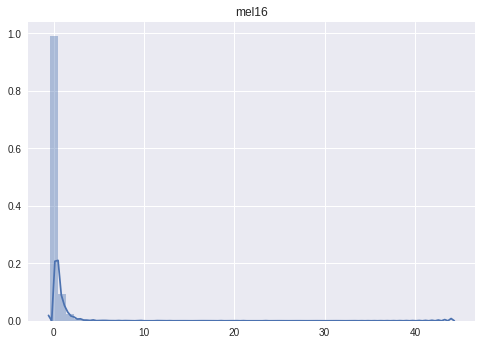

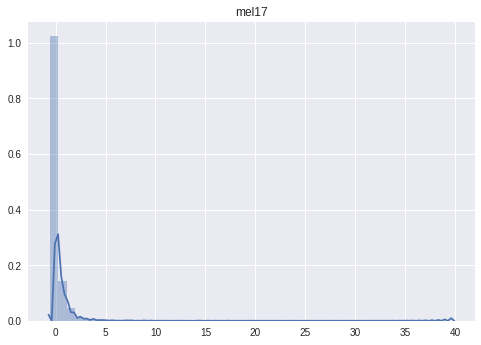

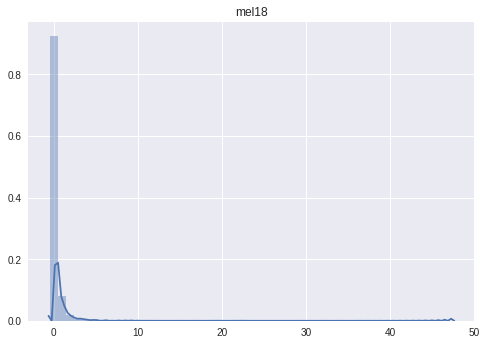

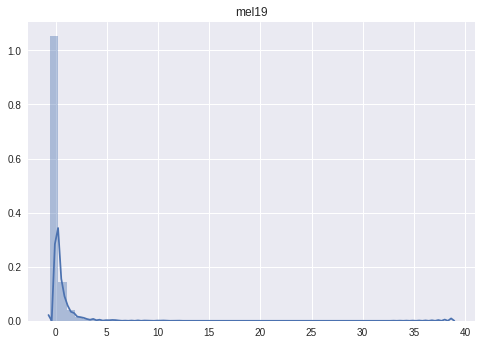

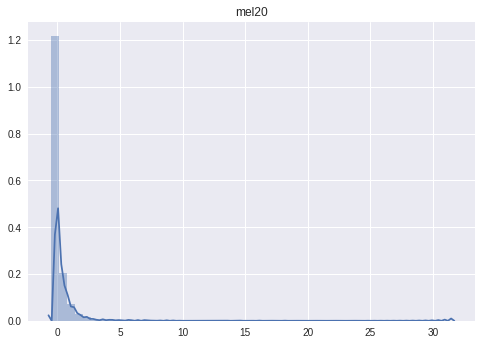

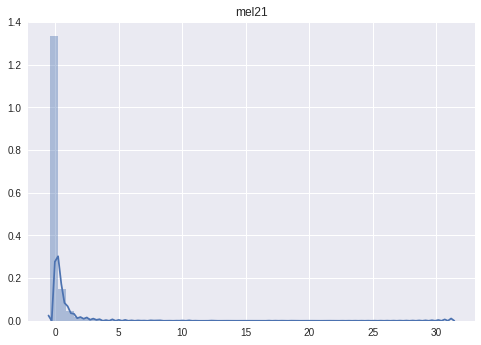

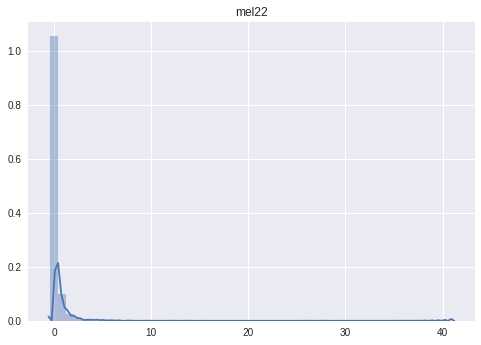

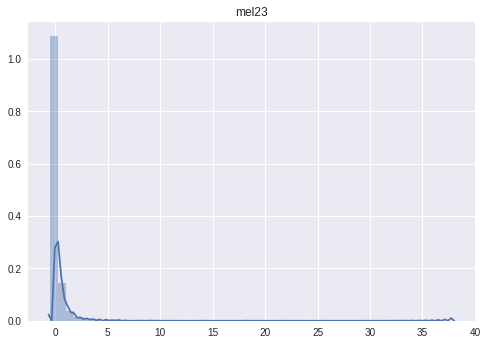

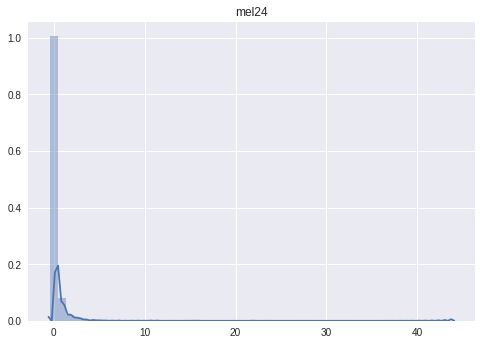

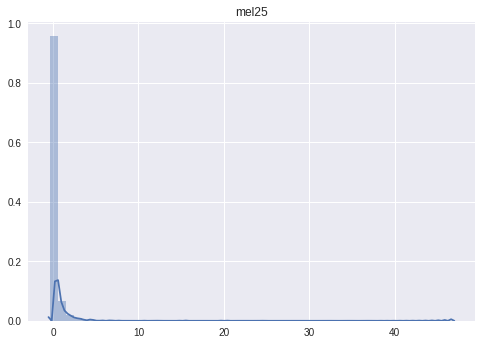

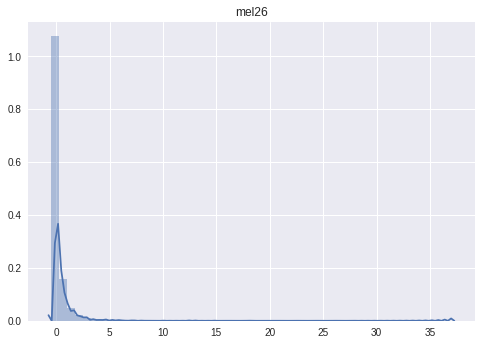

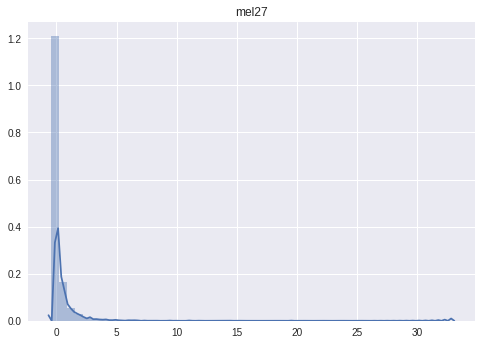

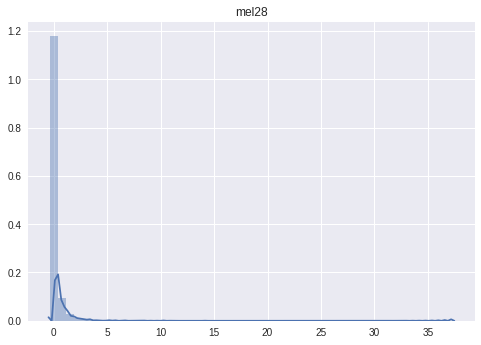

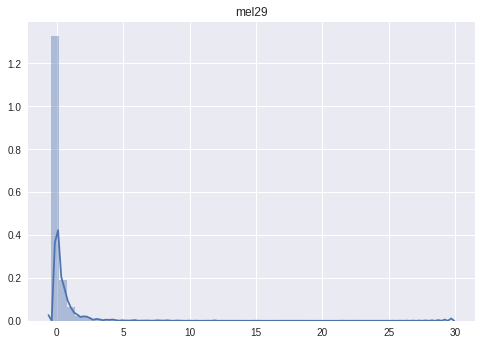

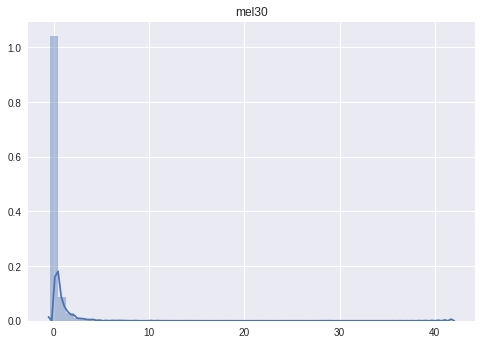

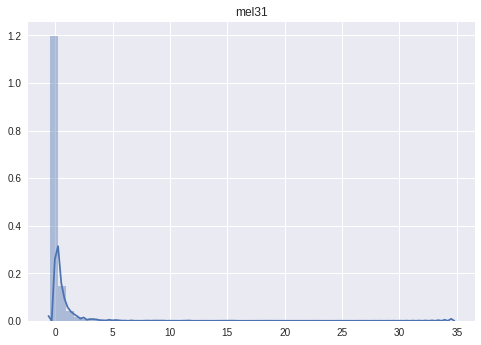

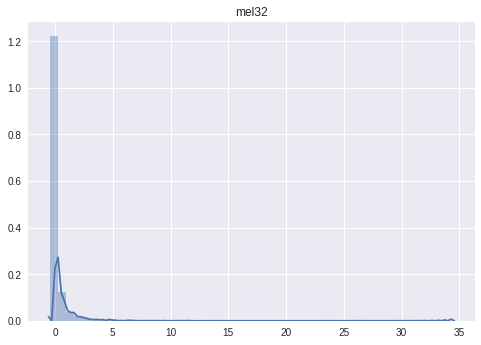

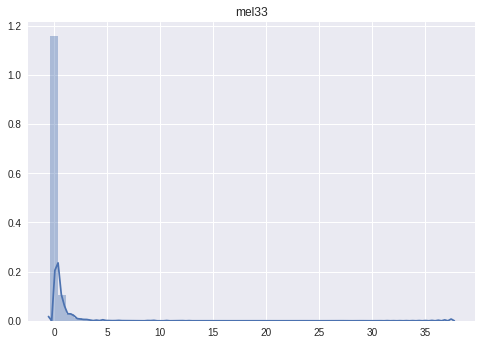

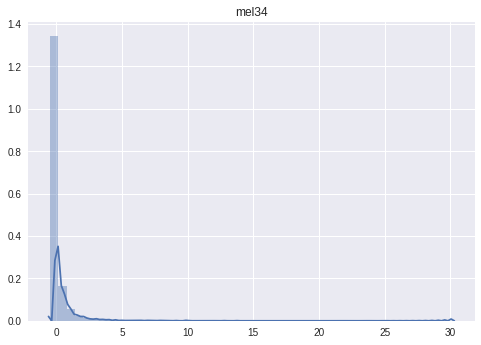

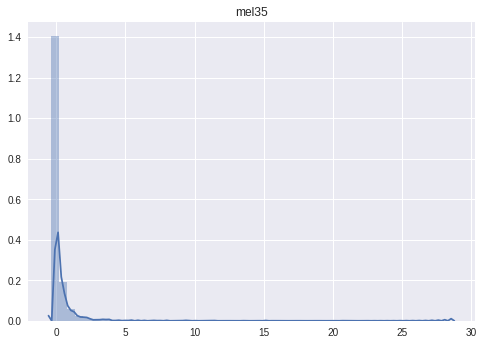

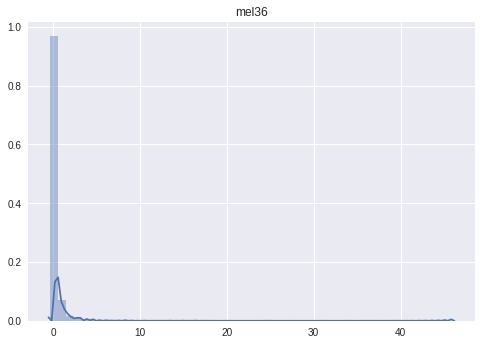

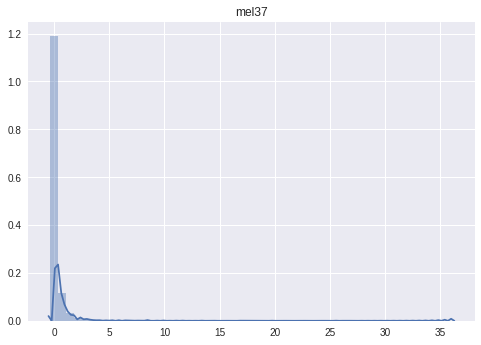

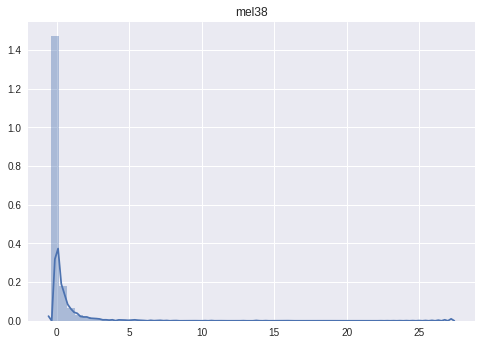

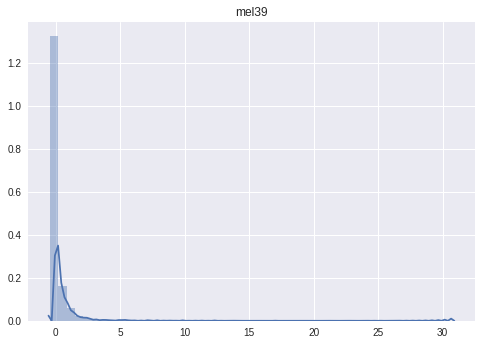

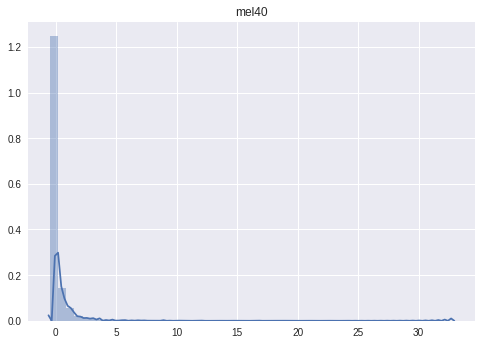

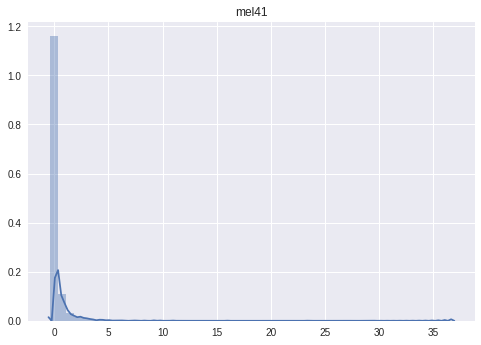

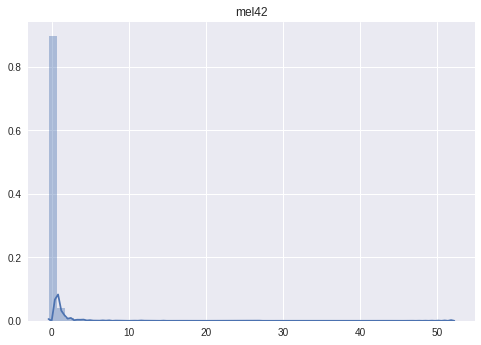

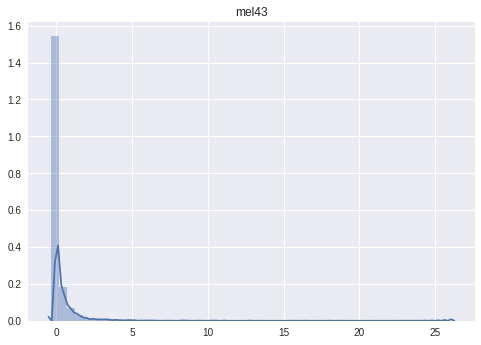

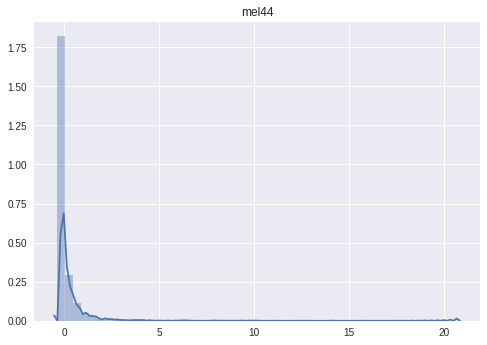

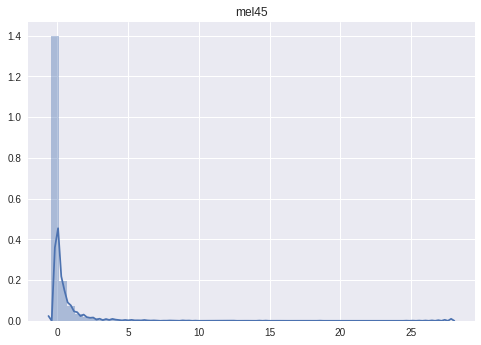

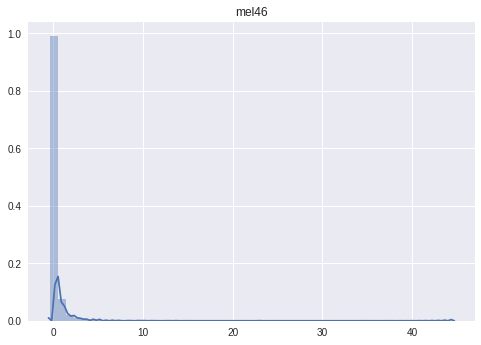

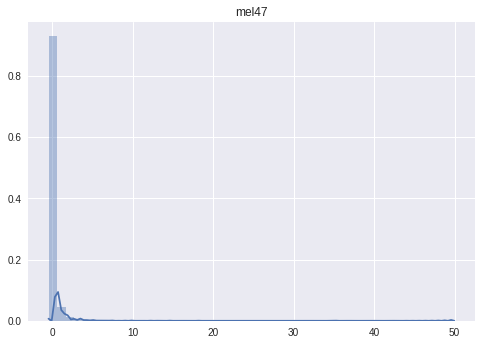

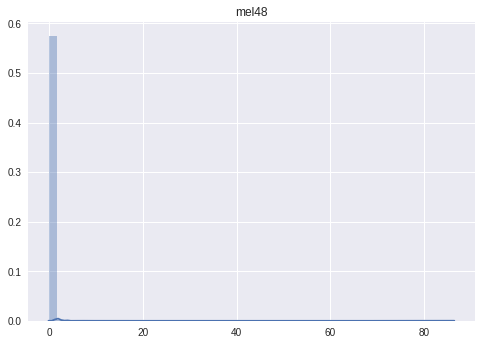

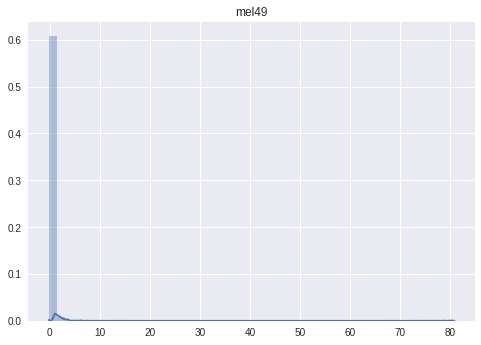

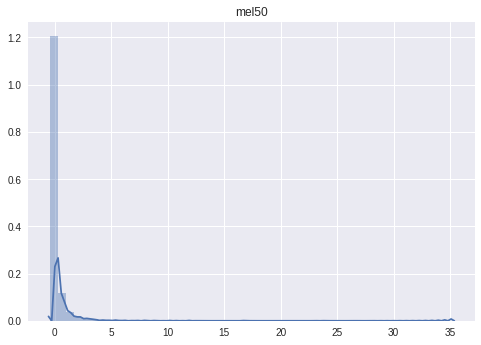

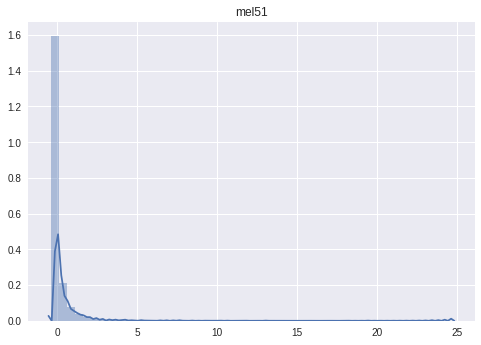

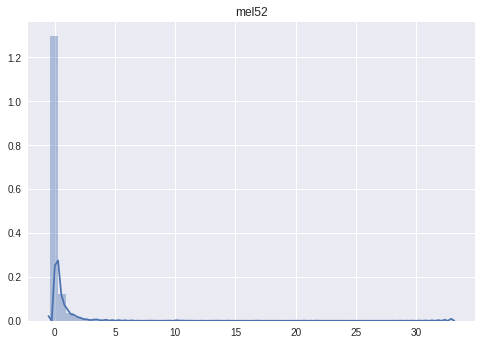

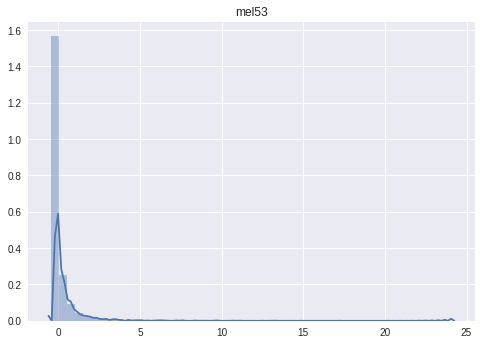

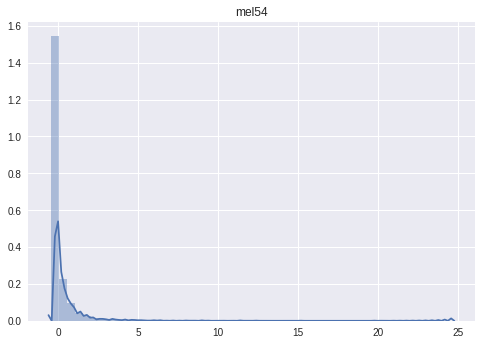

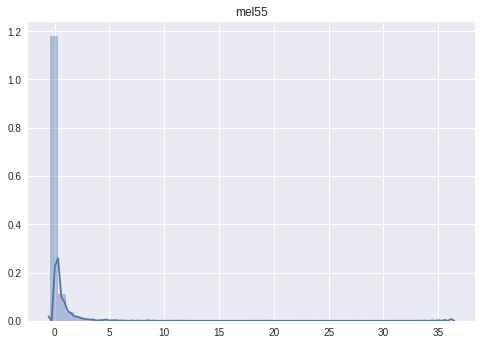

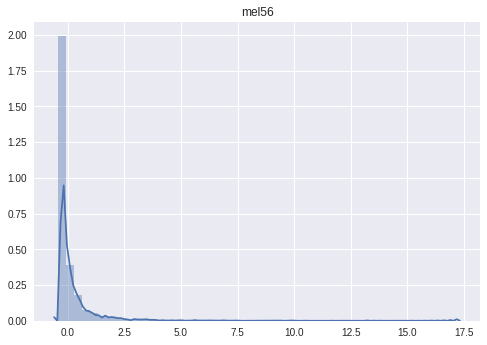

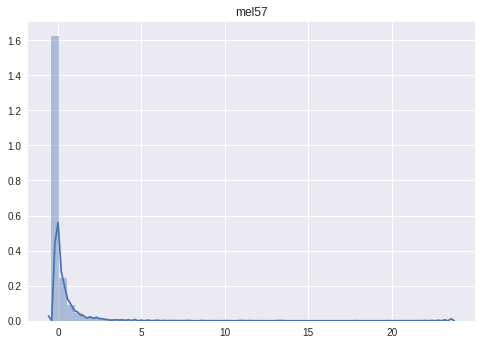

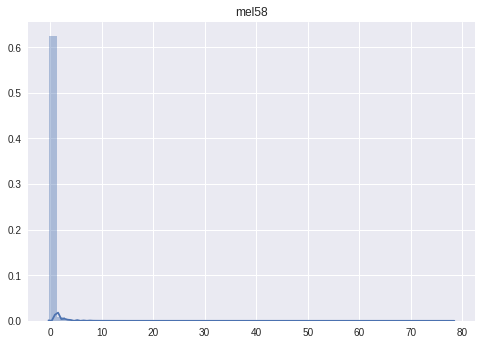

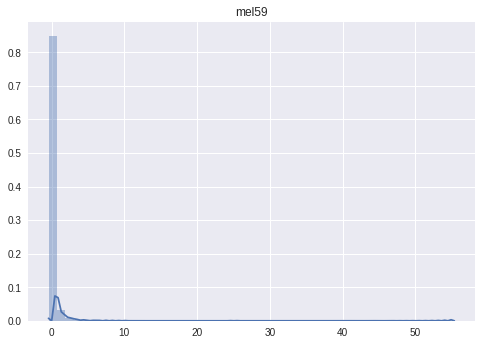

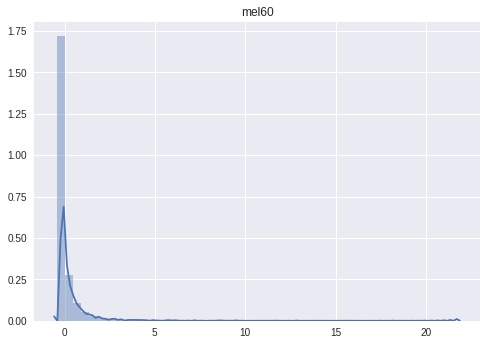

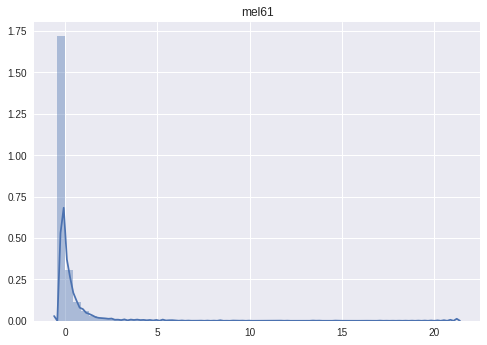

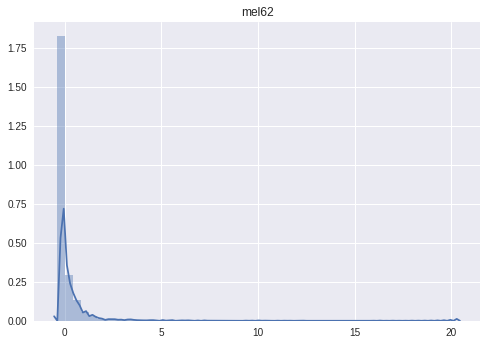

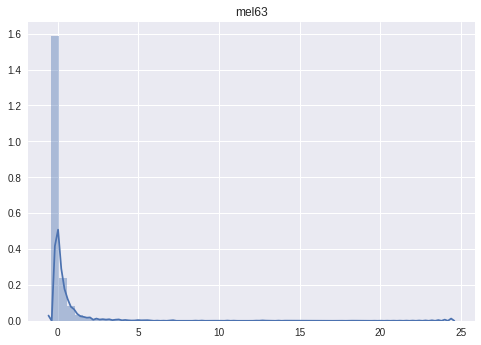

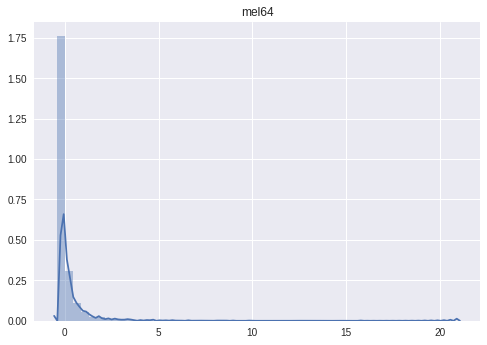

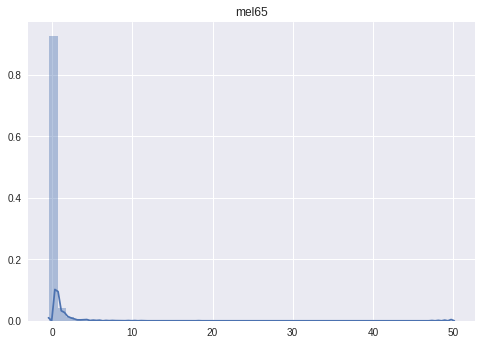

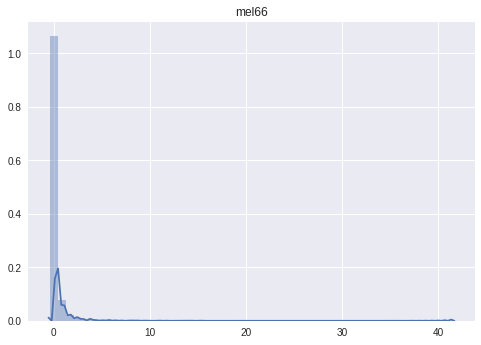

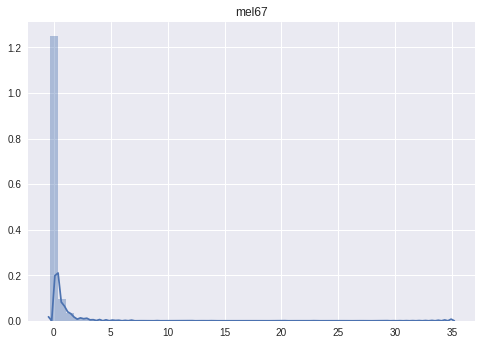

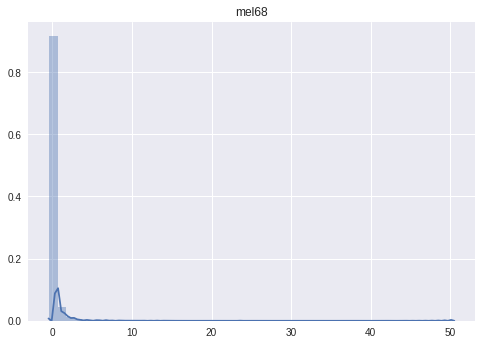

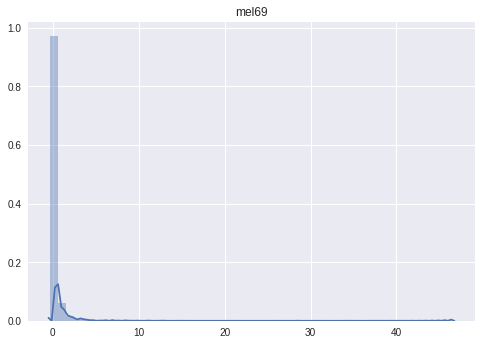

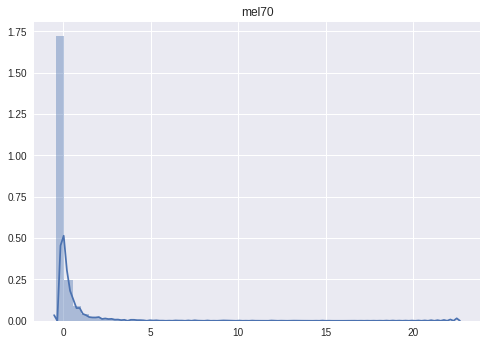

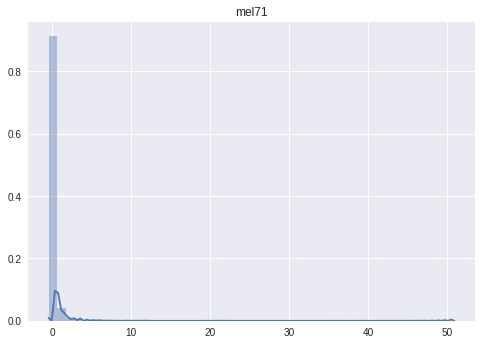

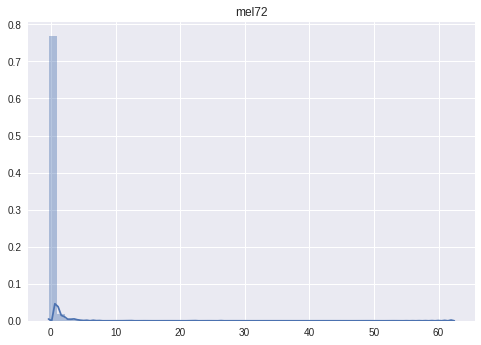

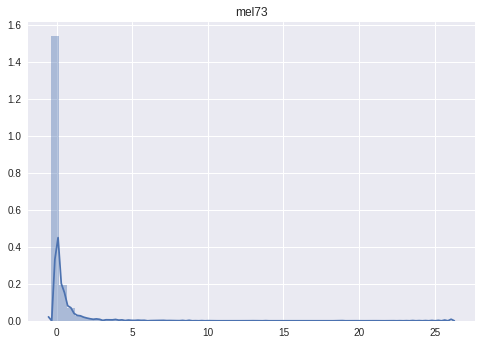

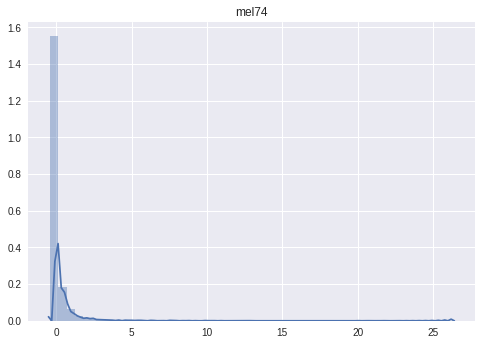

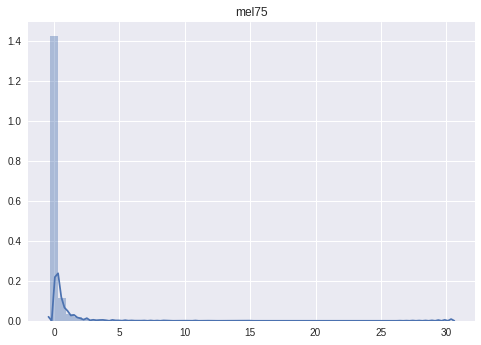

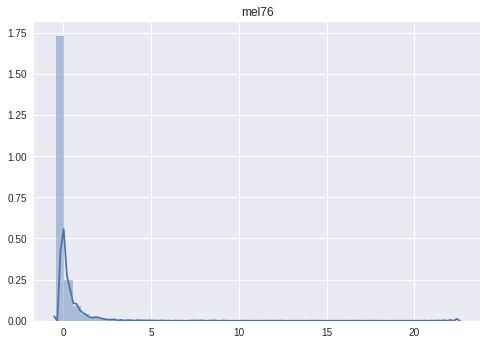

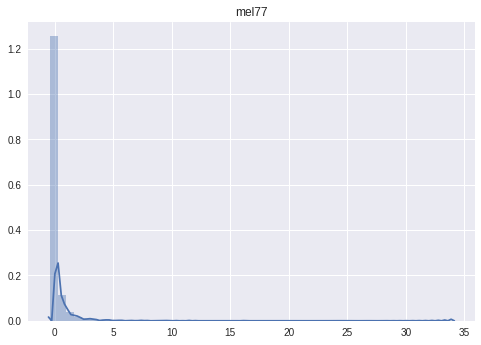

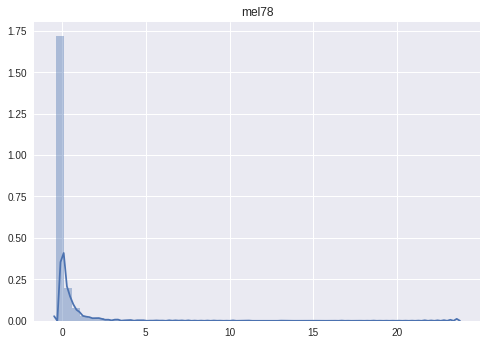

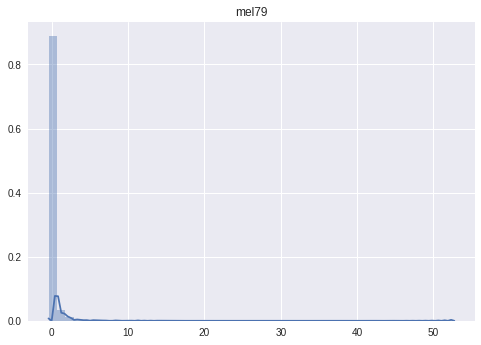

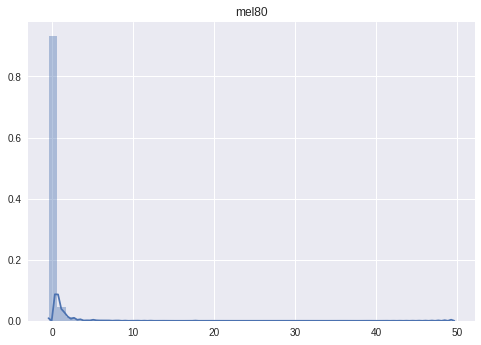

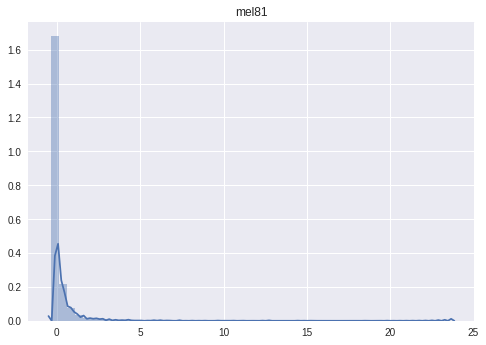

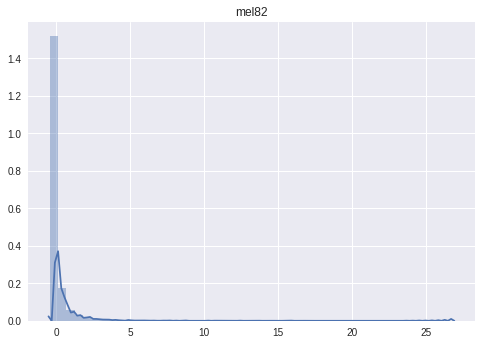

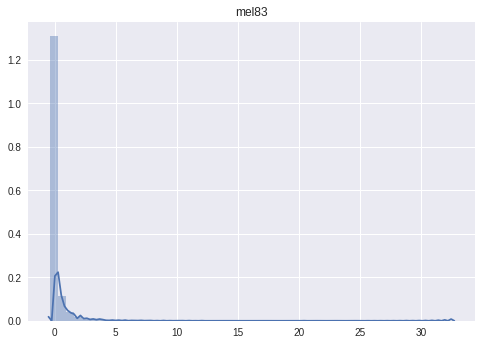

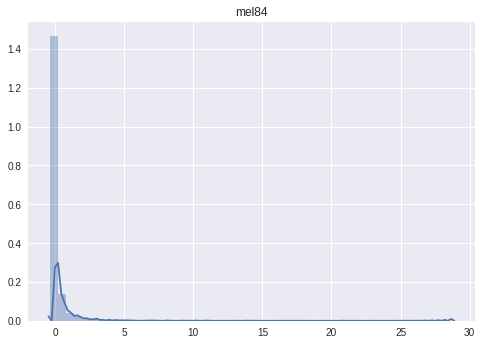

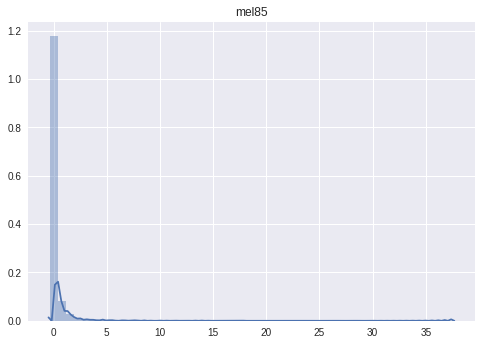

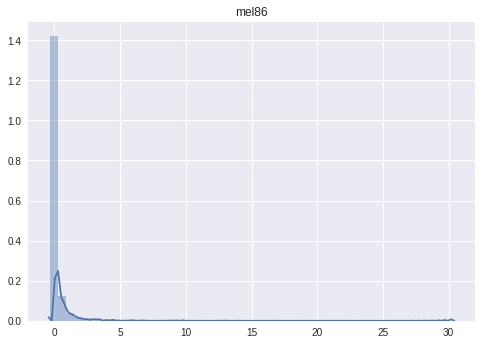

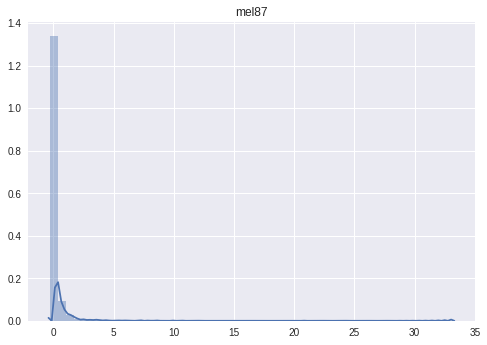

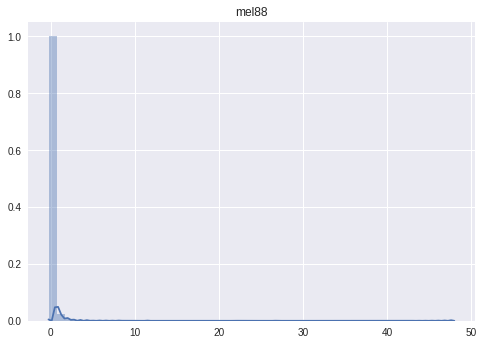

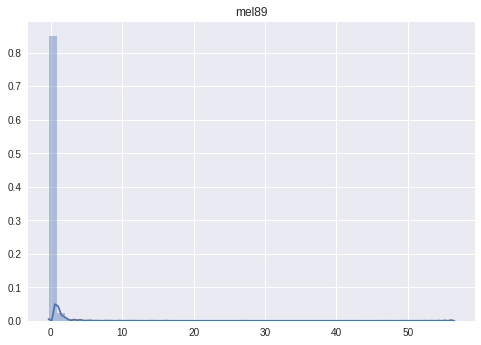

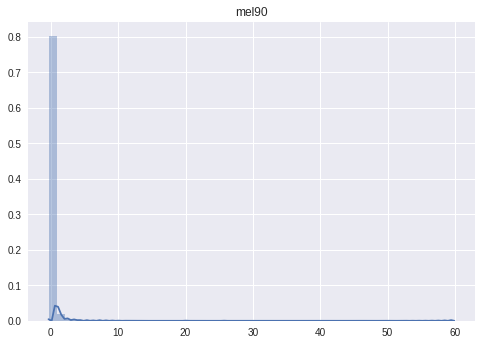

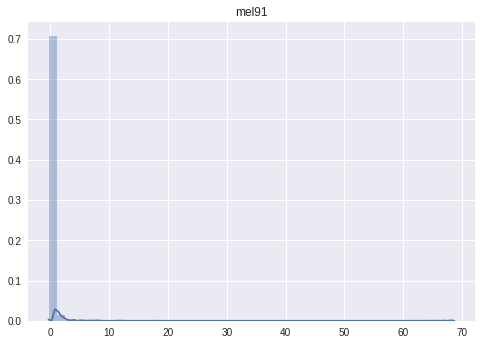

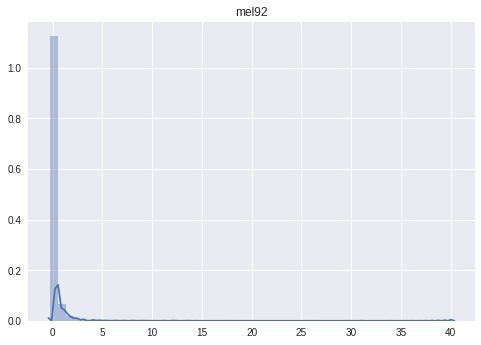

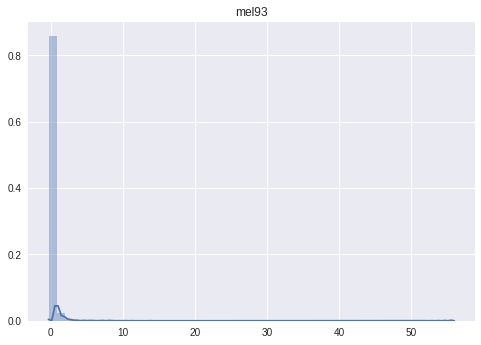

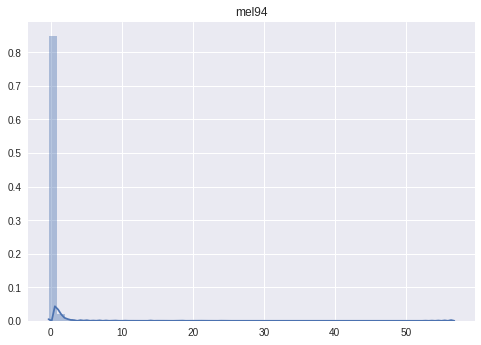

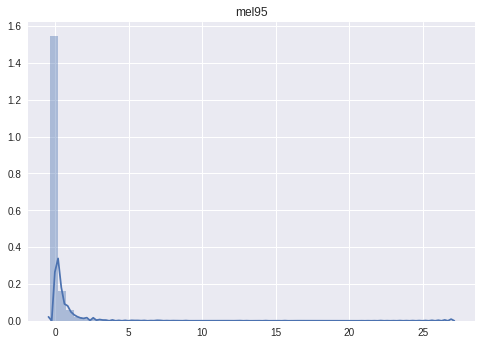

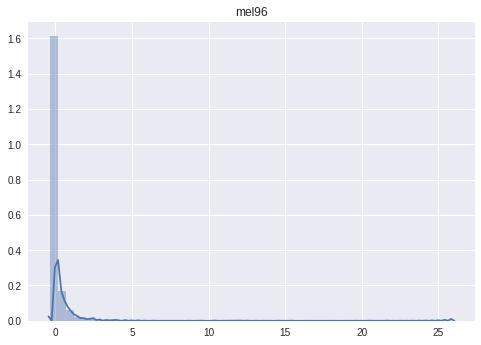

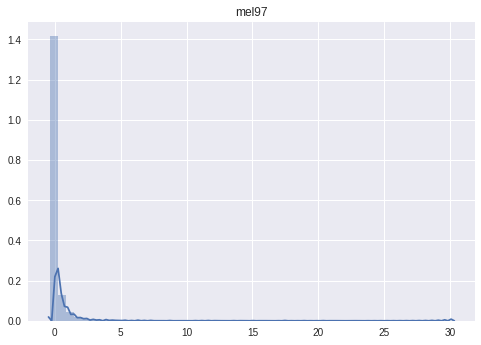

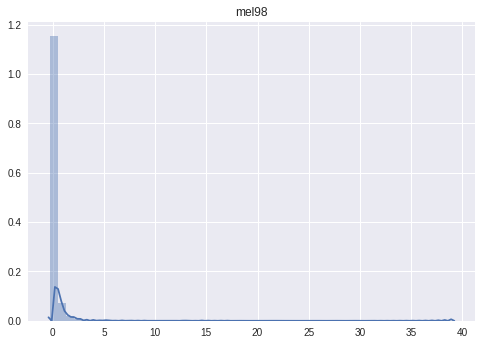

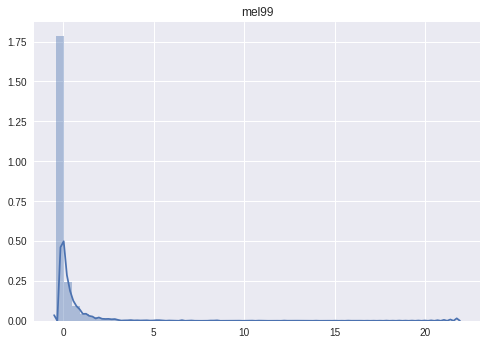

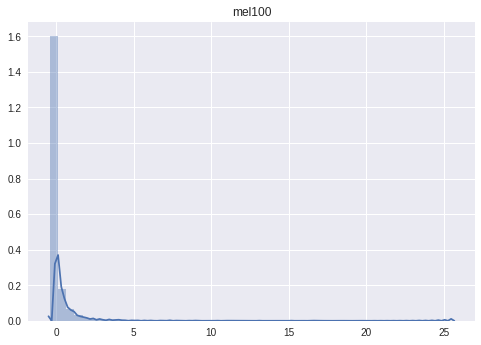

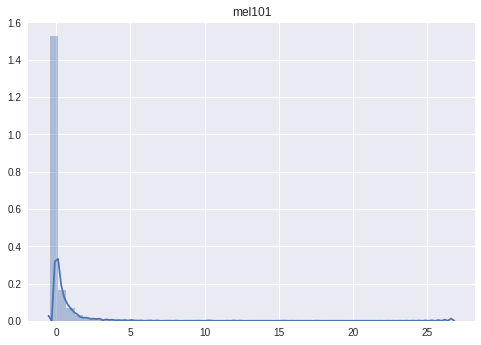

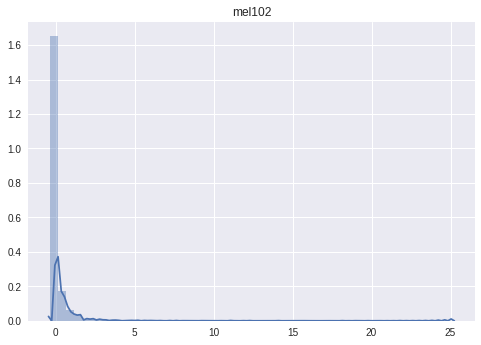

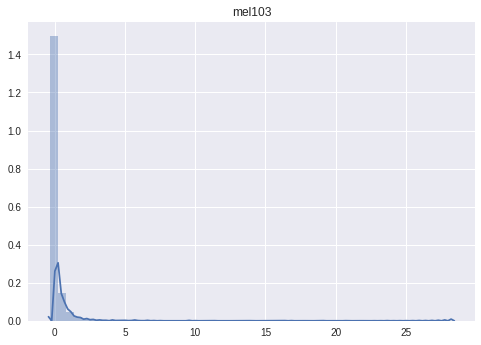

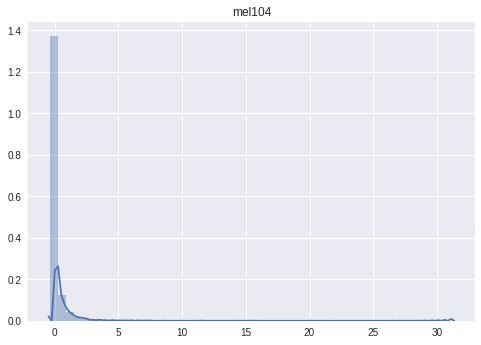

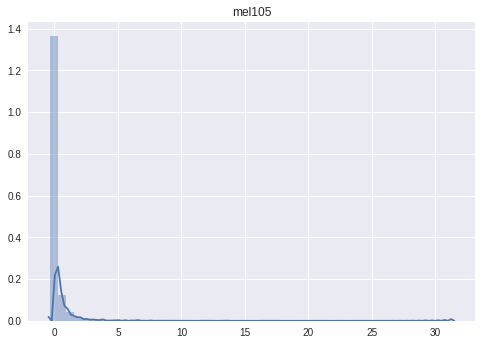

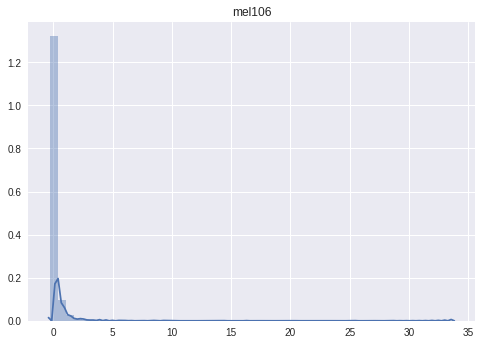

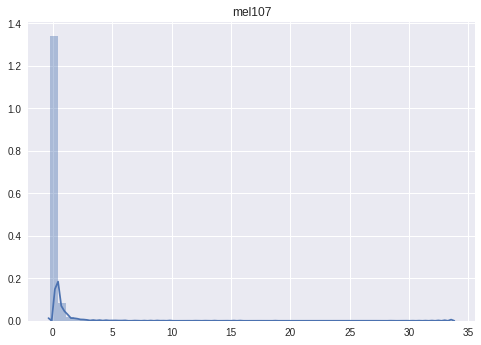

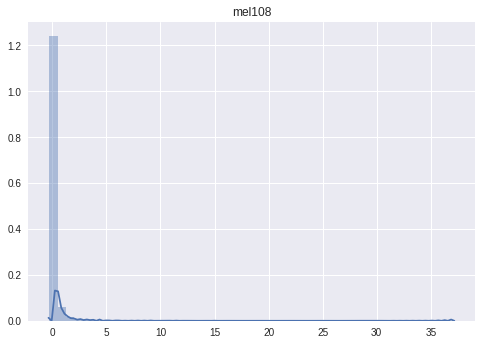

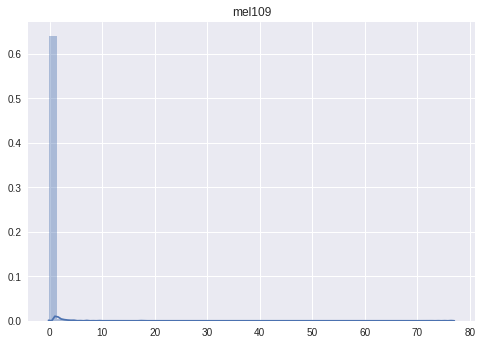

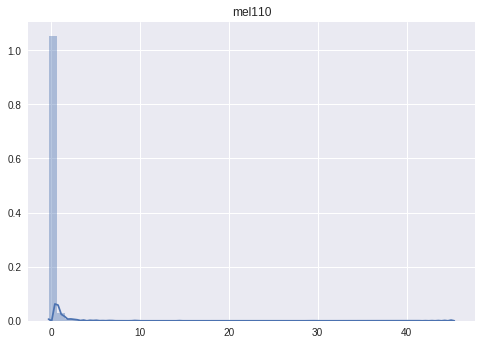

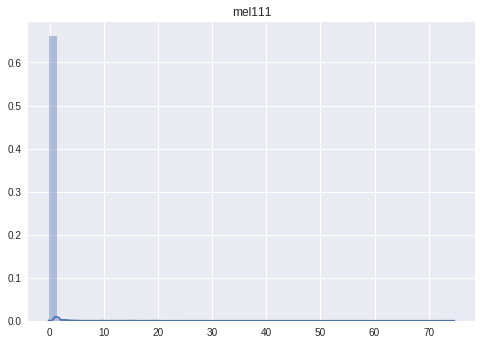

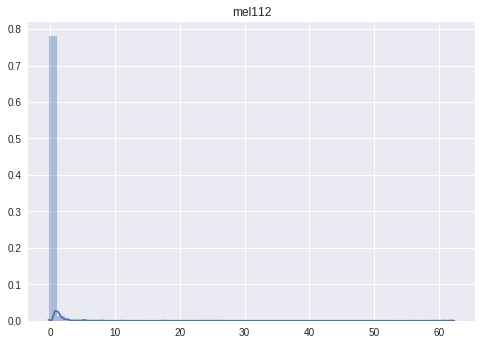

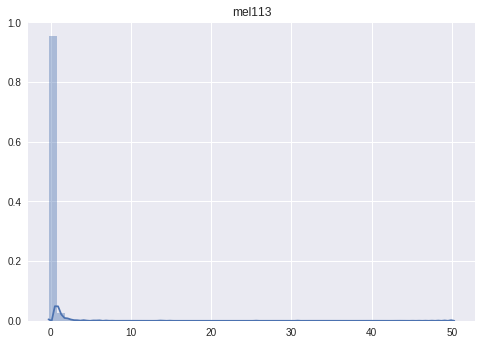

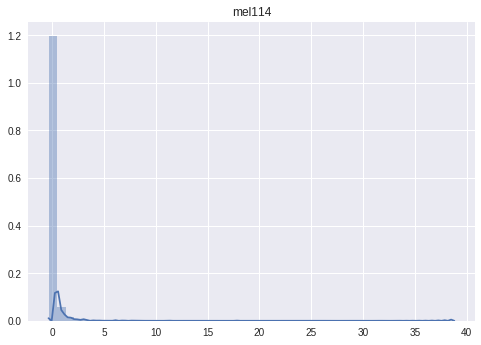

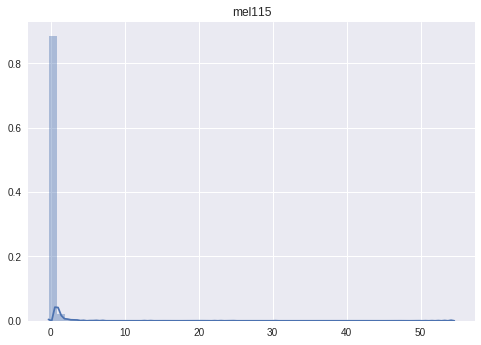

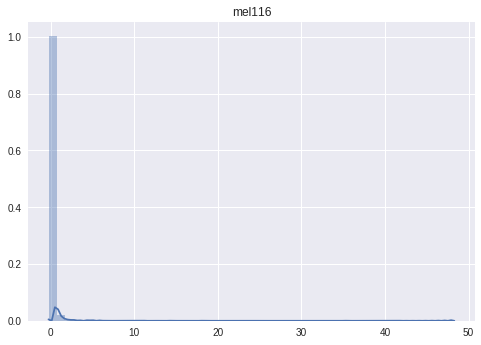

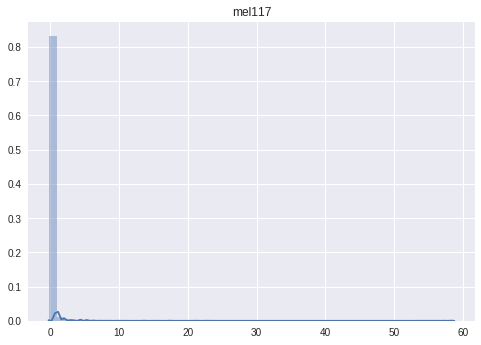

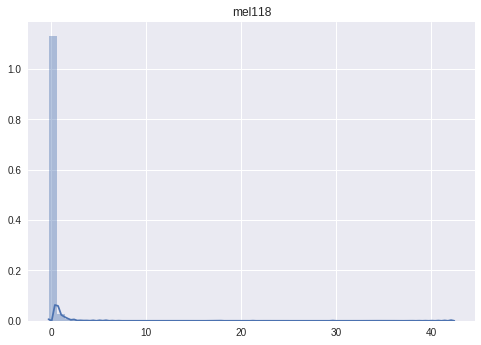

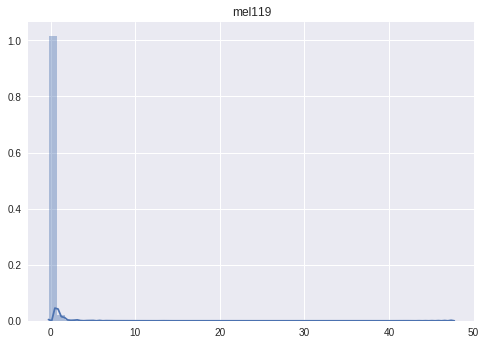

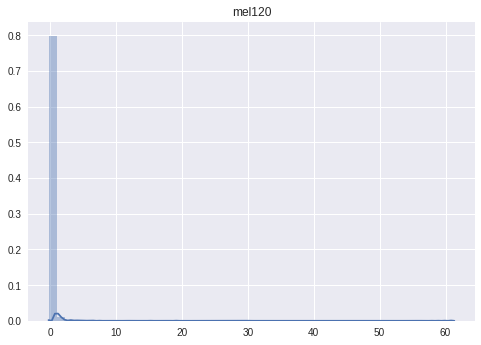

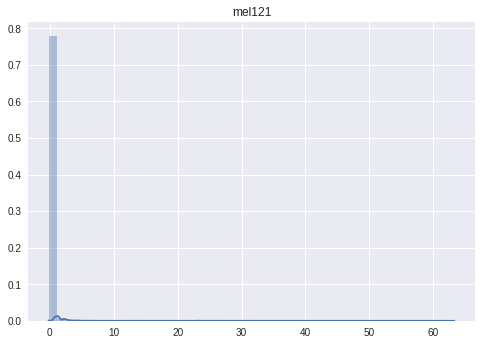

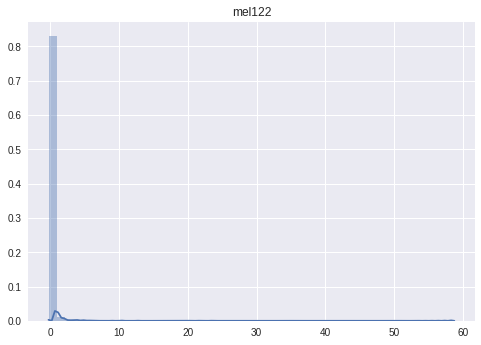

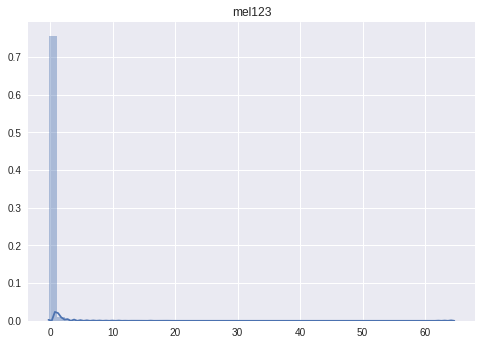

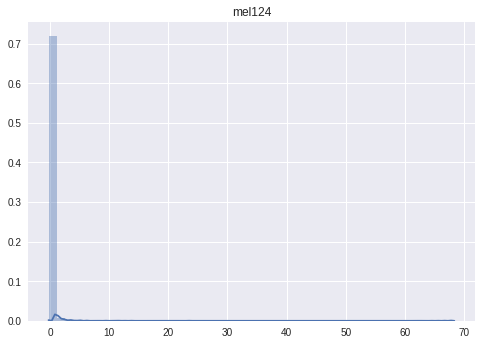

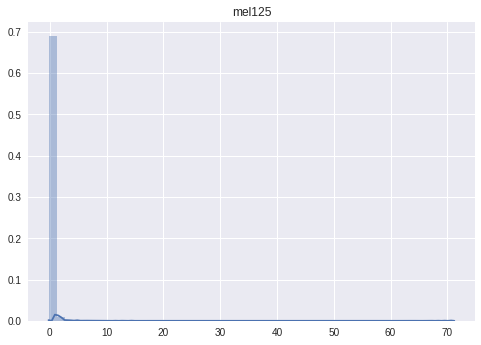

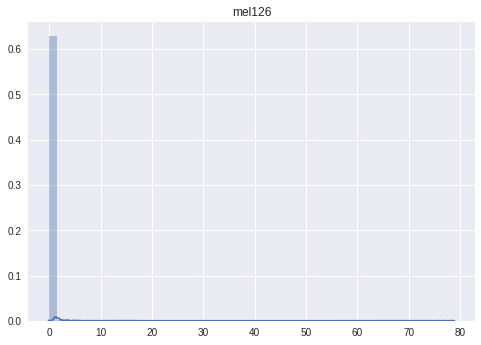

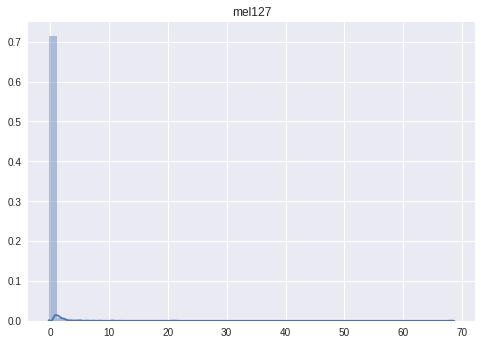

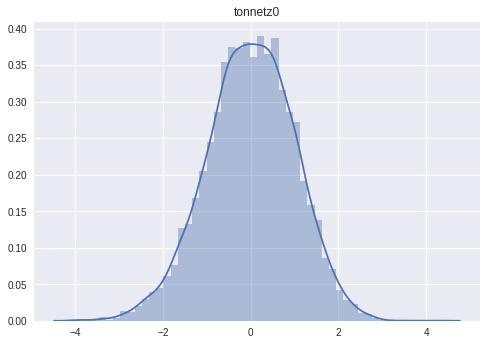

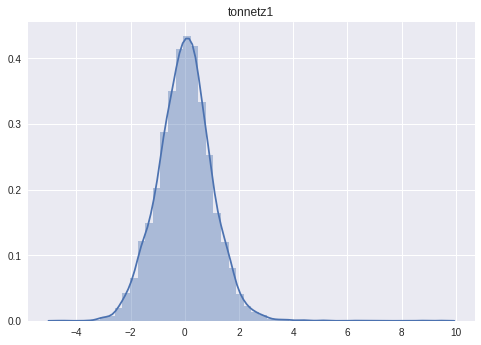

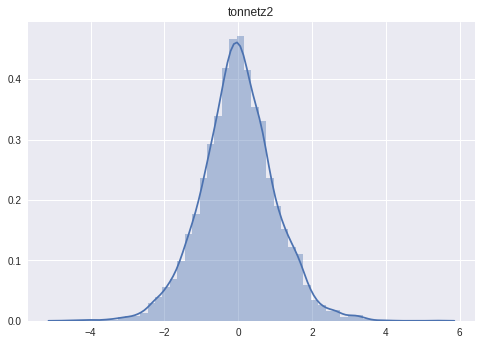

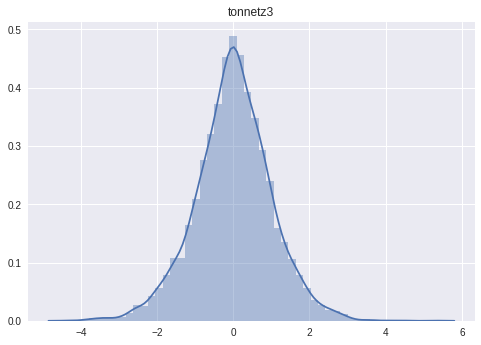

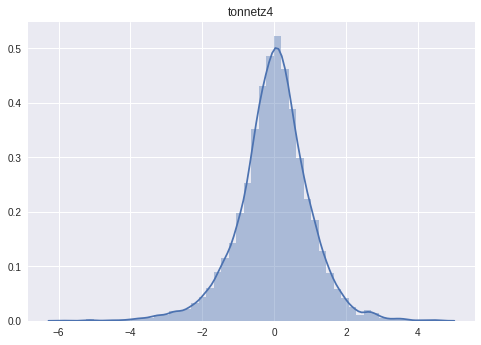

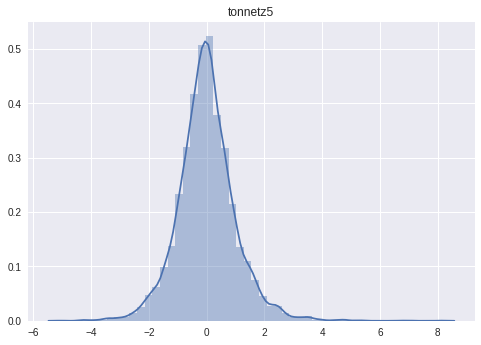

In [0]:
for i in range(X.shape[1]):
    plt.figure()
    sns.distplot(X[:,i])
    plt.title(data.columns[i])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5357, 167), (2640, 167), (5357, 8), (2640, 8))

### gtzan

In [0]:
data = pd.read_csv(gtzan_data_file)
data.head(5)

,filename,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel125,mel126,mel127,tonnetz0,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,label
0,blues.00000,-64.333641,85.861819,1.208516,29.171204,-5.514111,7.689081,-5.114528,4.839880,-5.055232,...,0.013465,0.003547,0.000135,0.007251,0.011417,0.012807,-0.019779,-0.000260,-0.006584,blues
1,blues.00001,-165.622812,105.994930,15.083680,29.554352,3.352400,11.853359,4.411836,4.268172,-0.666289,...,0.006568,0.001721,0.000100,0.010583,0.019889,0.070882,0.021391,0.009458,-0.007278,blues
2,blues.00002,-31.542790,95.895333,-14.182318,17.575358,0.708948,7.906366,-9.224456,6.054815,-10.107317,...,0.020180,0.004763,0.000245,0.028663,-0.015501,0.075711,0.052866,0.000228,-0.010283,blues
3,blues.00003,-151.555455,123.047617,5.232385,20.823133,0.271176,5.388925,-1.930566,6.750064,-4.248411,...,0.003065,0.000700,0.000034,-0.001935,-0.016062,0.074330,0.007814,0.008162,-0.012986,blues
4,blues.00004,-103.032130,76.903800,-20.184523,-2.965566,-16.037358,-5.427795,-16.552024,1.667705,-14.833589,...,0.046598,0.008856,0.000393,-0.030723,0.017697,-0.109631,-0.159527,-0.012593,-0.026126,blues


In [0]:
data = data[(data.label != 'rock')]

In [0]:
data = data.drop('filename', axis=1)

In [0]:
data.shape

(900, 168)

In [0]:
for i in range(128):
    if 0 < i < 10:
        continue
    data = data.drop(f'mel{i}', axis=1)
data.shape

(1000, 168)

In [0]:
# Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = skl.preprocessing.LabelEncoder()
y = encoder.fit_transform(genre_list)
y = utils.to_categorical(y)

In [0]:
scaler = skl.preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



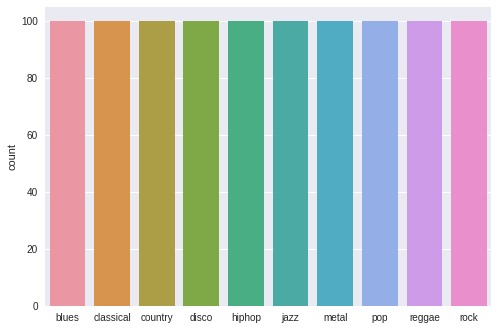

In [0]:
sns.countplot(np.array(genre_list))

In [0]:
for i in range(X.shape[1]):
    plt.figure()
    sns.distplot(X[:,i])
    plt.title(data.columns[i])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 167), (330, 167), (670, 10), (330, 10))

### Combine

In [0]:
def fix_gtzan_labels(data):
    data.loc[data.label == 'blues', 'label'] = 'Blues'
    data.loc[data.label == 'classical', 'label'] = 'Classical'
    data.loc[data.label == 'country', 'label'] = 'Country'
    data.loc[data.label == 'disco', 'label'] = 'Disco'
    data.loc[data.label == 'hiphop', 'label'] = 'Hip-Hop'
    data.loc[data.label == 'jazz', 'label'] = 'Jazz'
    data.loc[data.label == 'metal', 'label'] = 'Metal'
    data.loc[data.label == 'pop', 'label'] = 'Pop'
    data.loc[data.label == 'reggae', 'label'] = 'Reggae'
    data.loc[data.label == 'rock', 'label'] = 'Rock'

In [0]:
fma_data = pd.read_csv(fma_data_file)
gtzan_data = pd.read_csv(gtzan_data_file)
fix_gtzan_labels(gtzan_data)
data = fma_data.append(gtzan_data)
data = data.drop('filename', axis=1)

In [0]:
data = data[(data.label != 'Blues') & (data.label != 'Pop') &
            (data.label != 'Disco') & (data.label != 'Country') &
            (data.label != 'Experimental')]

In [40]:
np.unique(data.label)

array(['Classical', 'Electronic', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Jazz', 'Metal', 'Reggae', 'Rock'], dtype=object)

In [41]:
for i in range(128):
    if 0 < i < 10:
        continue
    data = data.drop(f'mel{i}', axis=1)
data.shape

(6598, 49)

In [0]:
# Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = skl.preprocessing.LabelEncoder()
y = encoder.fit_transform(genre_list)
y = utils.to_categorical(y)

In [0]:
scaler = skl.preprocessing.StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype=float))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



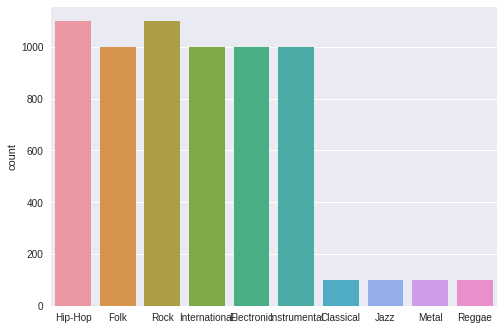

In [44]:
sns.countplot(np.array(genre_list))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



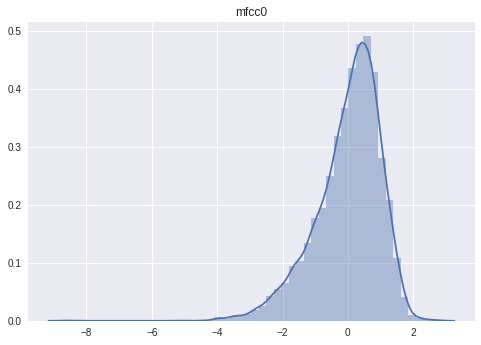

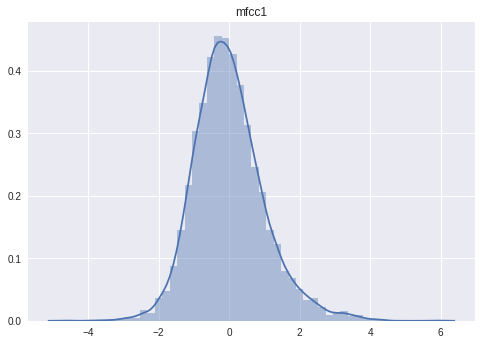

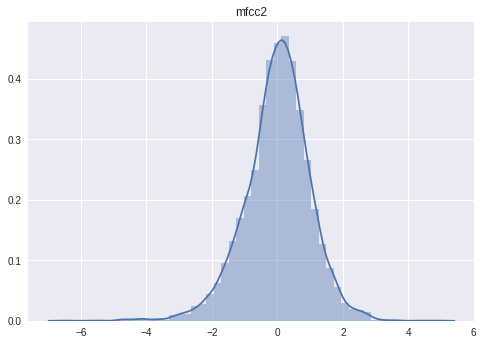

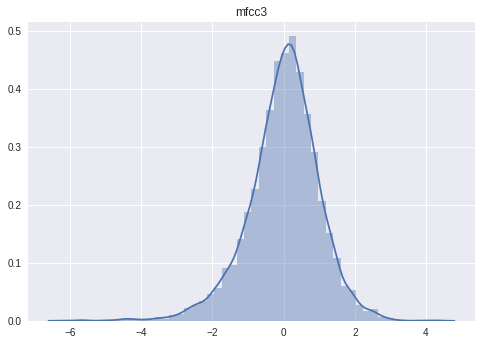

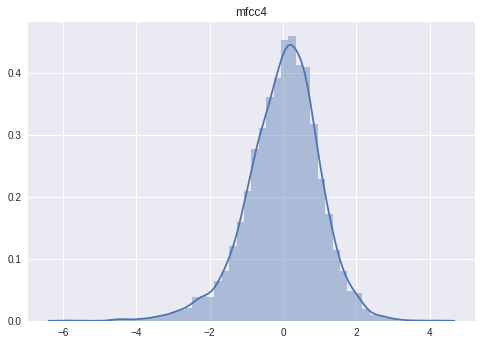

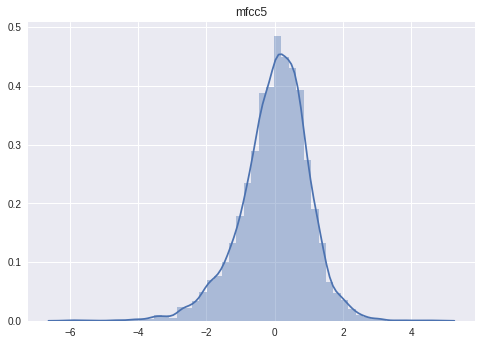

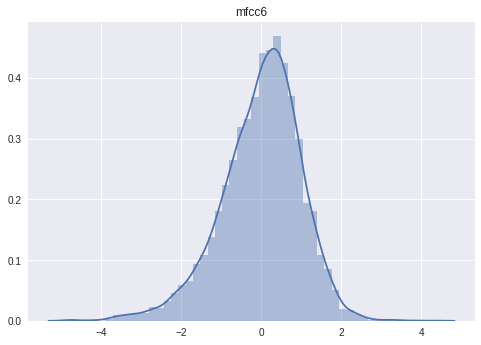

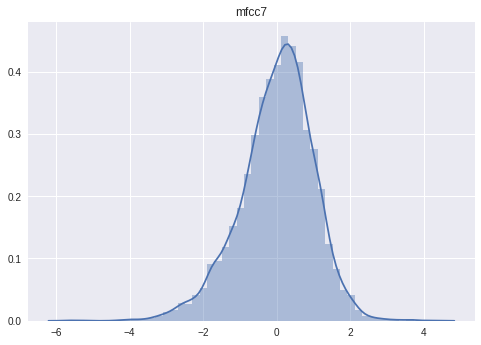

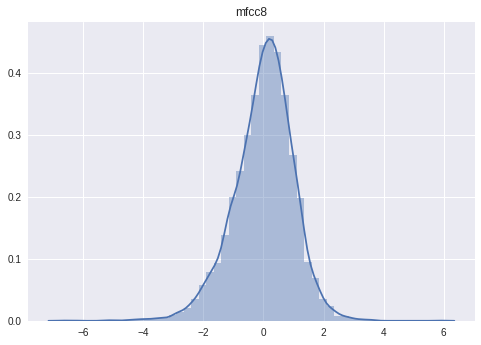

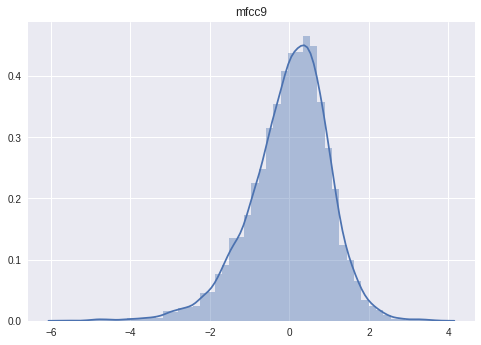

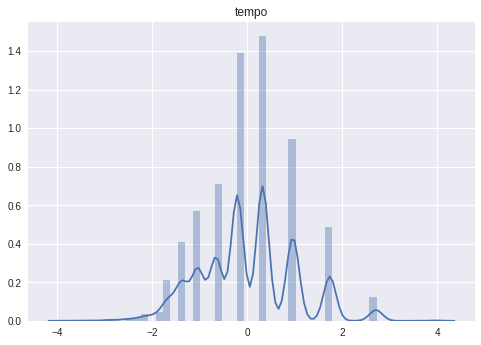

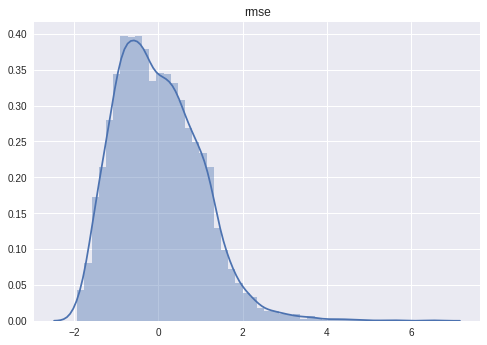

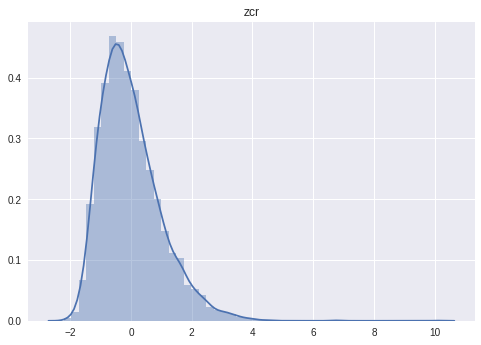

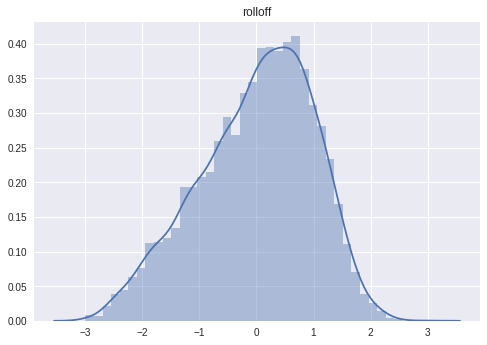

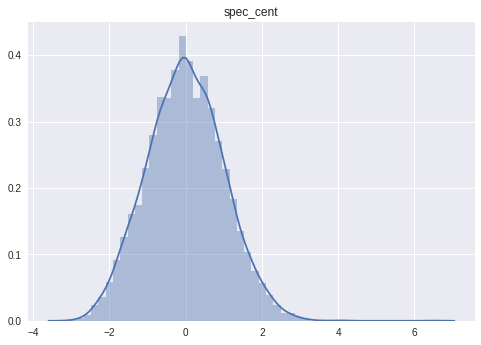

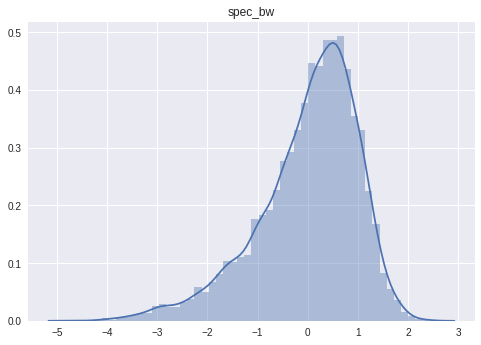

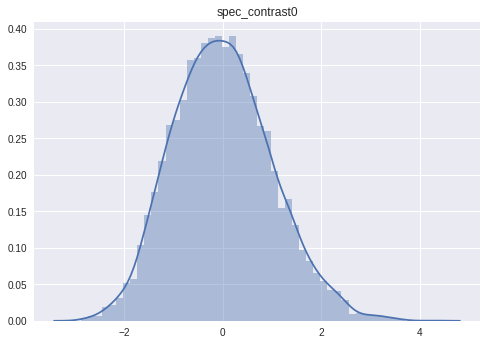

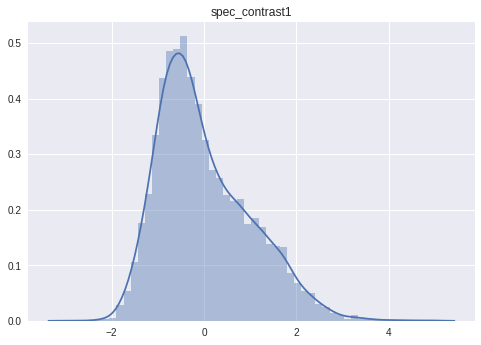

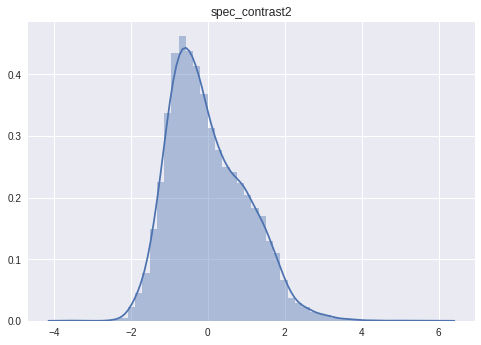

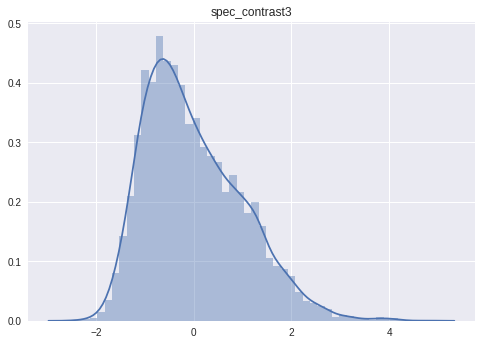

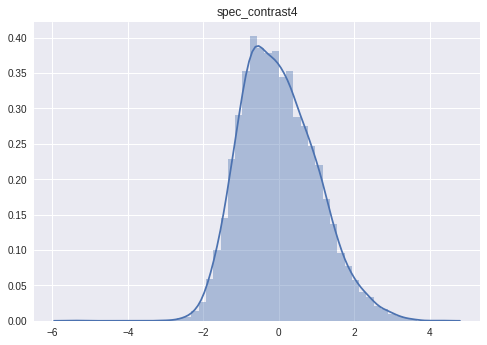

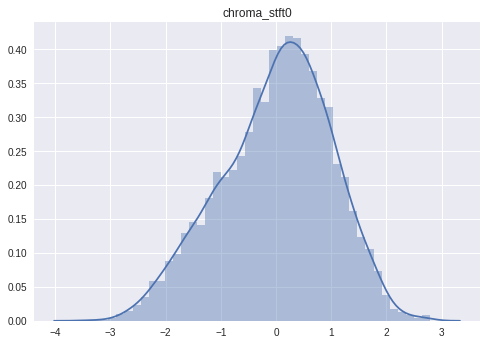

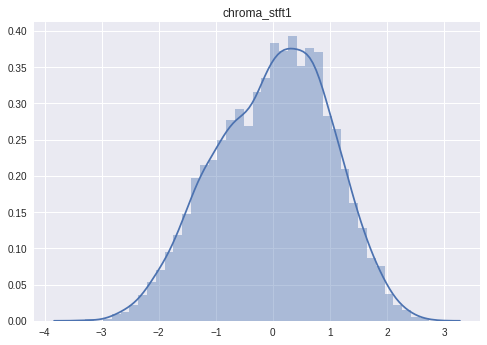

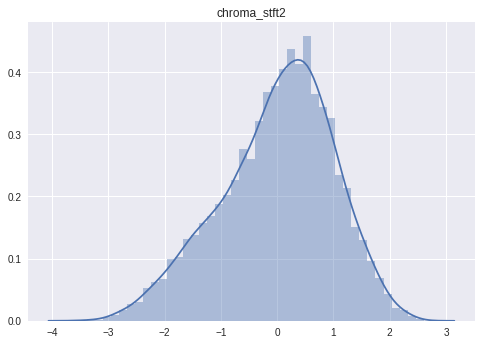

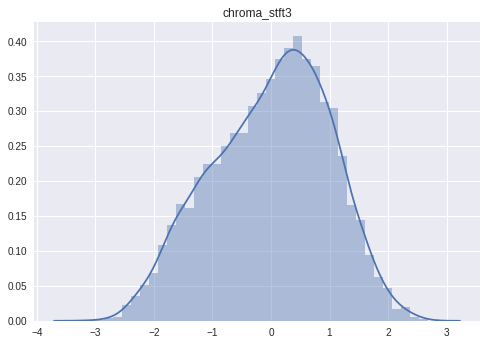

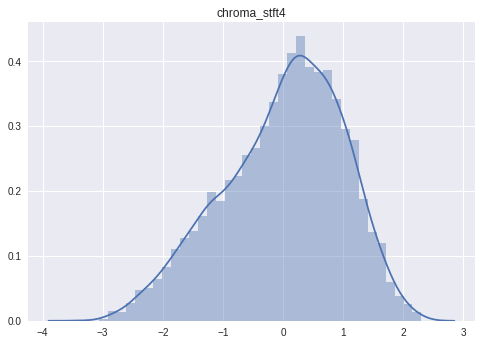

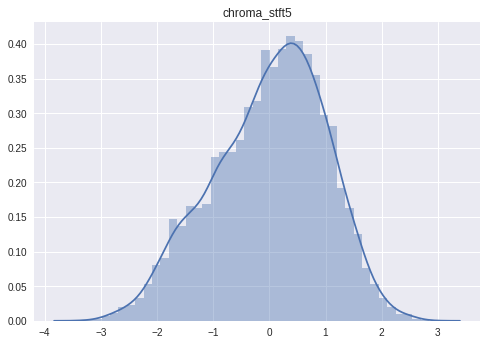

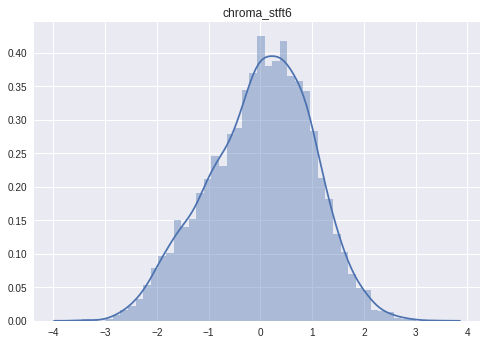

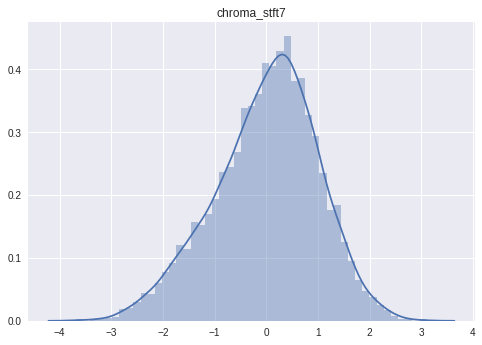

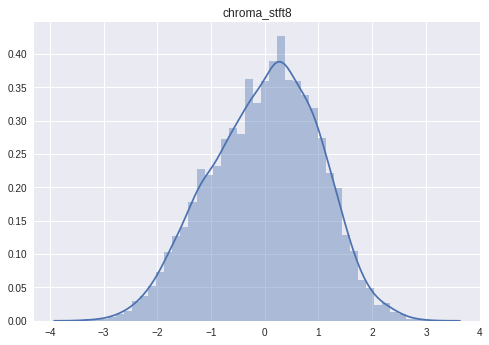

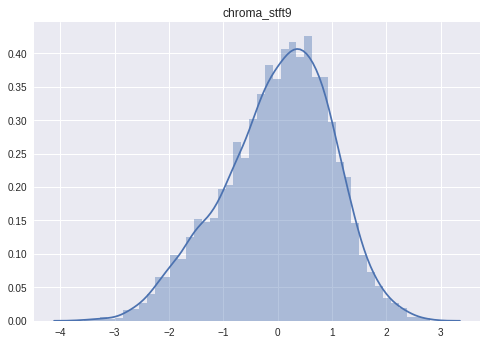

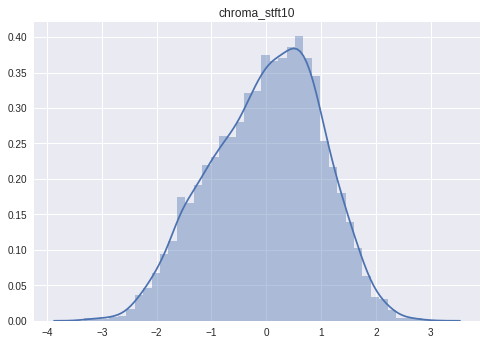

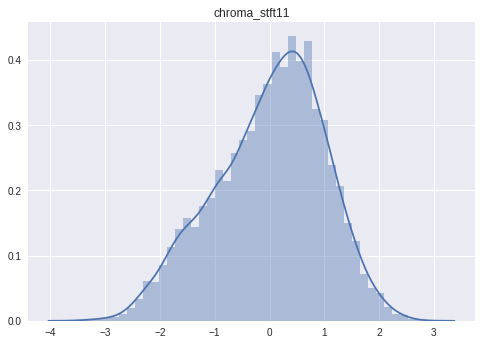

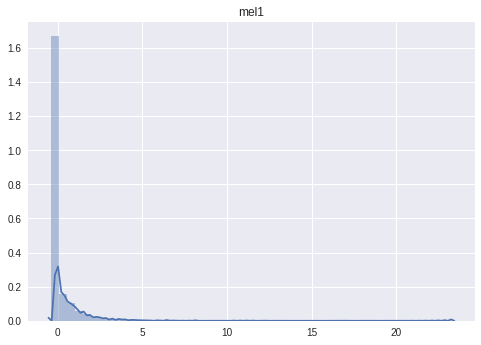

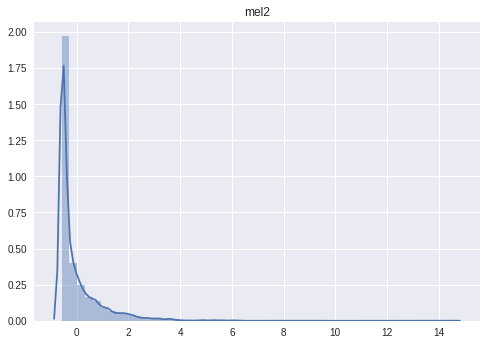

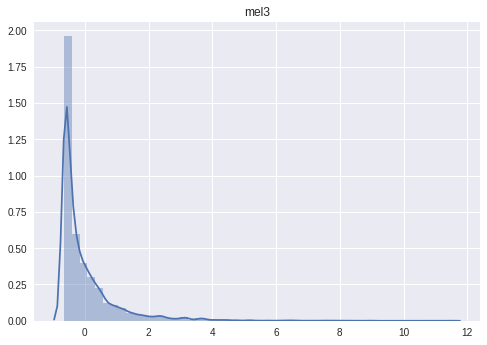

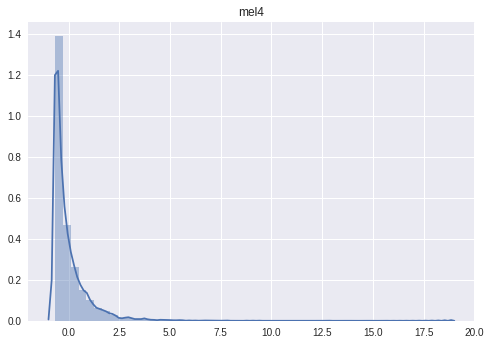

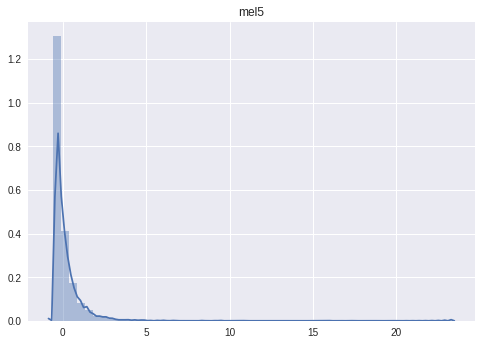

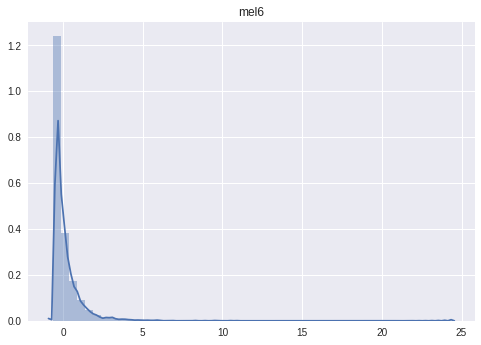

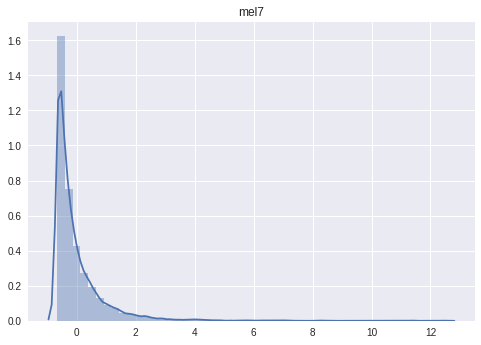

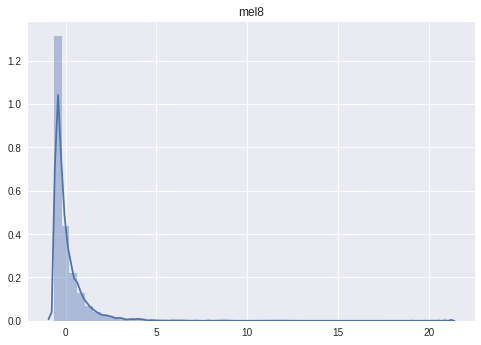

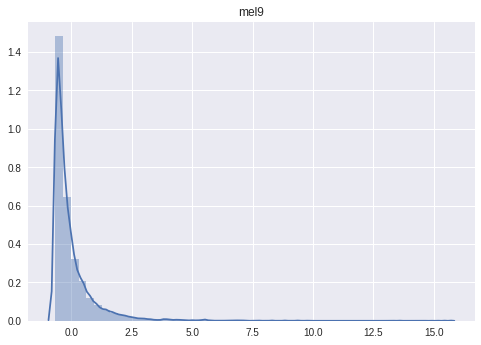

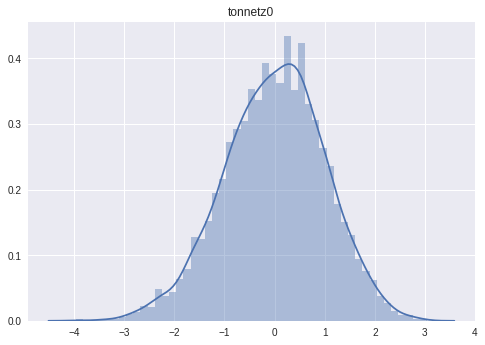

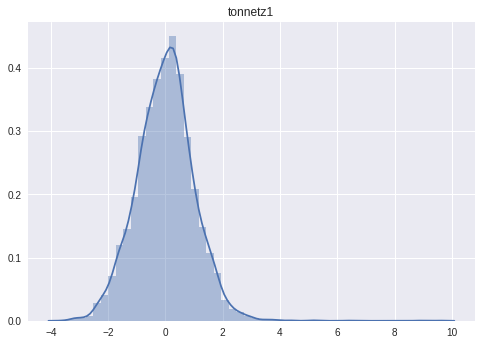

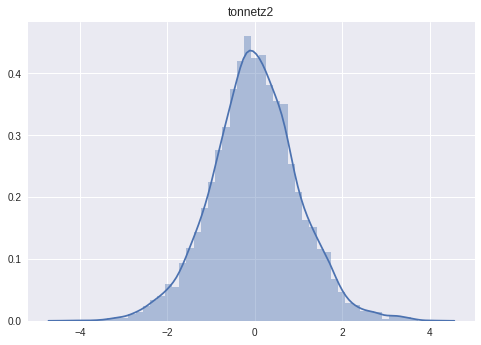

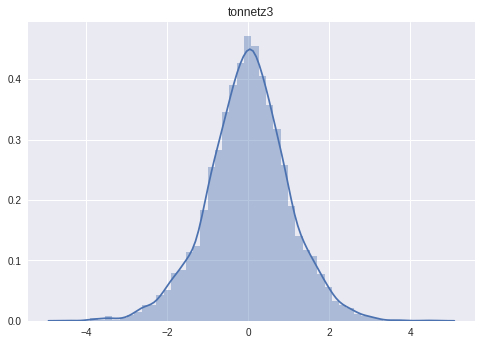

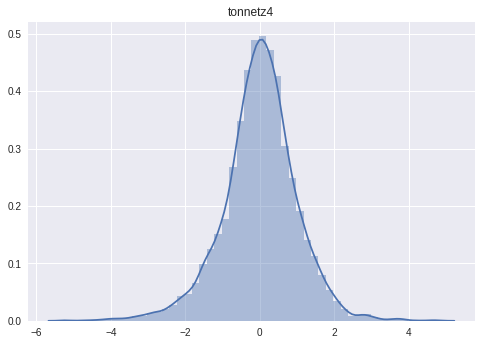

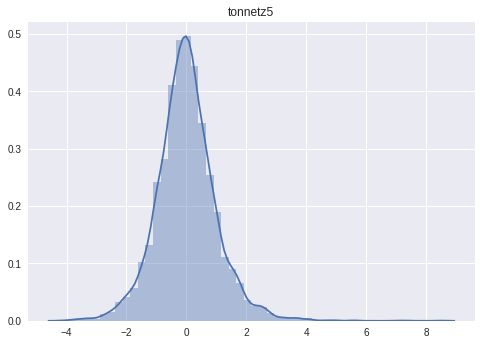

In [45]:
for i in range(X.shape[1]):
    plt.figure()
    sns.distplot(X[:,i])
    plt.title(data.columns[i])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4420, 48), (2178, 48), (4420, 10), (2178, 10))

## Model

In [0]:
def get_model(x_shape, y_shape):
    model = models.Sequential()
    
    model.add(layers.Dense(4096, input_shape=(x_shape,), kernel_regularizer=regularizers.l2(0.2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.8))
    
    model.add(layers.Dense(y_shape, activation='softmax'))

    model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(lr=0.00005), metrics=['accuracy'])
    return model

In [0]:
cbs = [callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, mode='auto', restore_best_weights=True)]

In [50]:
y_integers = np.argmax(y_train, axis=1)
class_weights = skl.utils.compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 6.597014925373134,
 1: 0.6606875934230194,
 2: 0.6597014925373135,
 3: 0.5997286295793759,
 4: 0.6597014925373135,
 5: 0.6597014925373135,
 6: 6.597014925373134,
 7: 6.597014925373134,
 8: 6.597014925373134,
 9: 0.6005434782608695}

In [0]:
model = get_model(X_train.shape[1], y_train.shape[1])

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4096)              200704    
_________________________________________________________________
batch_normalization_3 (Batch (None, 4096)              16384     
_________________________________________________________________
activation_3 (Activation)    (None, 4096)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                40970     
Total params: 258,058
Trainable params: 249,866
Non-trainable params: 8,192
_________________________________________________________________


## Teach

In [53]:
model = get_model(X_train.shape[1], y_train.shape[1])
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    callbacks=cbs,
                    class_weight=d_class_weights)

Train on 4420 samples, validate on 2178 samples
Epoch 1/2000
4420/4420 [==============================] - 1s 171us/step - loss: 21.9679 - acc: 0.1430 - val_loss: 20.4182 - val_acc: 0.2787
Epoch 2/2000
4420/4420 [==============================] - 0s 40us/step - loss: 20.9558 - acc: 0.2036 - val_loss: 19.7285 - val_acc: 0.3306
Epoch 3/2000
4420/4420 [==============================] - 0s 41us/step - loss: 20.1796 - acc: 0.2326 - val_loss: 19.1054 - val_acc: 0.3751
Epoch 4/2000
4420/4420 [==============================] - 0s 42us/step - loss: 19.5129 - acc: 0.2480 - val_loss: 18.5414 - val_acc: 0.3930
Epoch 5/2000
4420/4420 [==============================] - 0s 42us/step - loss: 18.8738 - acc: 0.2742 - val_loss: 17.9843 - val_acc: 0.4050
Epoch 6/2000
4420/4420 [==============================] - 0s 40us/step - loss: 18.2962 - acc: 0.2896 - val_loss: 17.4416 - val_acc: 0.4164
Epoch 7/2000
4420/4420 [==============================] - 0s 41us/step - loss: 17.6323 - acc: 0.3156 - val_loss: 16.8

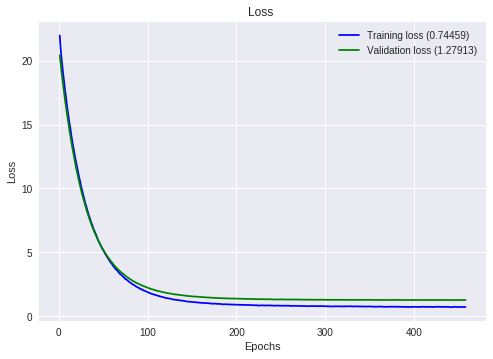

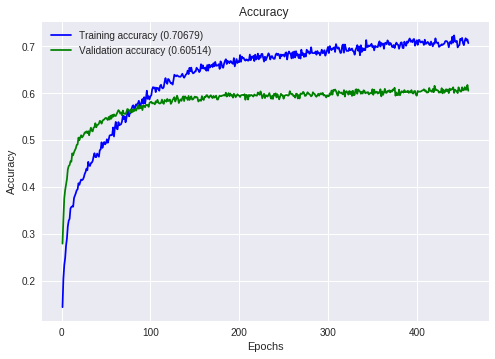

In [54]:
plot_history(history)

In [55]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Accuracy: {:.2%}'.format(test_acc))

2178/2178 [==============================] - 0s 74us/step
Accuracy: 60.84%


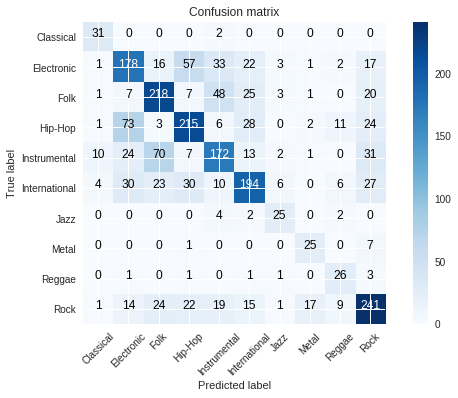

In [56]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_test_classes = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=encoder.classes_)

In [57]:
print(skl.metrics.classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_))

               precision    recall  f1-score   support

    Classical       0.63      0.94      0.76        33
   Electronic       0.54      0.54      0.54       330
         Folk       0.62      0.66      0.64       330
      Hip-Hop       0.63      0.59      0.61       363
 Instrumental       0.59      0.52      0.55       330
International       0.65      0.59      0.62       330
         Jazz       0.61      0.76      0.68        33
        Metal       0.53      0.76      0.62        33
       Reggae       0.46      0.79      0.58        33
         Rock       0.65      0.66      0.66       363

    micro avg       0.61      0.61      0.61      2178
    macro avg       0.59      0.68      0.63      2178
 weighted avg       0.61      0.61      0.61      2178



In [0]:
model.save('model_v1.h5')

In [0]:
!tensorflowjs_converter --input_format keras \
                       model_v1.h5 \
                       tfjs_target_dir

In [63]:
my_model = KerasRegressor(build_fn=get_model,
  x_shape=X_train.shape[1], y_shape=y_train.shape[1],
  epochs=2000, batch_size=1024, validation_data=(X_test, y_test), callbacks=cbs)    
hist = my_model.fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=42).fit(X_train, y_train)

Train on 4420 samples, validate on 2178 samples
Epoch 1/2000
4420/4420 [==============================] - 1s 176us/step - loss: 22.5478 - acc: 0.1215 - val_loss: 20.8820 - val_acc: 0.2305
Epoch 2/2000
4420/4420 [==============================] - 0s 22us/step - loss: 21.9363 - acc: 0.1538 - val_loss: 20.4145 - val_acc: 0.3003
Epoch 3/2000
4420/4420 [==============================] - 0s 22us/step - loss: 21.3867 - acc: 0.2068 - val_loss: 20.0529 - val_acc: 0.3577
Epoch 4/2000
4420/4420 [==============================] - 0s 20us/step - loss: 20.9907 - acc: 0.2459 - val_loss: 19.7454 - val_acc: 0.4004
Epoch 5/2000
4420/4420 [==============================] - 0s 19us/step - loss: 20.6284 - acc: 0.2618 - val_loss: 19.4647 - val_acc: 0.4210
Epoch 6/2000
4420/4420 [==============================] - 0s 19us/step - loss: 20.3067 - acc: 0.2989 - val_loss: 19.1949 - val_acc: 0.4440
Epoch 7/2000
4420/4420 [==============================] - 0s 19us/step - loss: 19.9726 - acc: 0.3088 - val_loss: 18.9

In [64]:
eli5.show_weights(perm, feature_names=data.columns[:-1].tolist(), top=None)

Weight,Feature
0.3241 ± 0.0201,spec_contrast4
0.2972 ± 0.0099,spec_bw
0.2613 ± 0.0285,mfcc1
0.2280 ± 0.0163,zcr
0.2062 ± 0.0140,mfcc0
0.1808 ± 0.0100,mfcc3
0.1642 ± 0.0089,spec_contrast1
0.1636 ± 0.0108,spec_contrast2
0.1632 ± 0.0037,spec_contrast3
0.1584 ± 0.0113,rolloff


# Results

## Uploading mp3

In [69]:
uploaded = gc.files.upload()

Saving free bird.mp3 to free bird.mp3
Saving free_bird_cut_1.mp3 to free_bird_cut_1.mp3
Saving free_bird_cut_2.mp3 to free_bird_cut_2.mp3
Saving free_bird_cut_3.mp3 to free_bird_cut_3.mp3
Saving instumental_cut_1.mp3 to instumental_cut_1.mp3
Saving instumental_cut_2.mp3 to instumental_cut_2.mp3
Saving instumental_cut_3.mp3 to instumental_cut_3.mp3
Saving Beethoven Moonlight Sonata.mp3 to Beethoven Moonlight Sonata.mp3
Saving rap_god_cut_1.mp3 to rap_god_cut_1.mp3
Saving rap_god_cut_2.mp3 to rap_god_cut_2.mp3
Saving rap_god_cut_3.mp3 to rap_god_cut_3.mp3
Saving shine on_cut_1.mp3 to shine on_cut_1.mp3
Saving shine on_cut_2.mp3 to shine on_cut_2.mp3
Saving shine on_cut_3.mp3 to shine on_cut_3.mp3
Saving shine on3.mp3 to shine on3.mp3


In [0]:
X_names = []
for name, data in uploaded.items():
    X_names.append(name)

In [0]:
X_names = ['free_bird_cut_1.mp3', 'free_bird_cut_2.mp3', 'free_bird_cut_3.mp3',
           'instumental_cut_1.mp3', 'instumental_cut_2.mp3', 'instumental_cut_3.mp3',
          'rap_god_cut_1.mp3', 'rap_god_cut_2.mp3', 'rap_god_cut_3.mp3', 
          'shine on_cut_1.mp3', 'shine on_cut_2.mp3', 'shine on_cut_3.mp3',
          'free bird.mp3', 'shine on3.mp3', 'Beethoven Moonlight Sonata.mp3']

## Extracting features

In [0]:
create_data_file(upload_data_file, with_labels=False)

In [0]:
for name in X_names:
    try:
        info = extract_info(name, name) + '\n'
        with open(upload_data_file, 'a', newline='') as data_file:
            data_file.write(info)
    except Exception as e:
        print('Fail', file, 'message', e, 'with path:', name)
        fail_cnt += 1
        continue

## Read data

In [73]:
test_data = pd.read_csv(upload_data_file)
test_data.head(5)

,filename,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,...,mel124,mel125,mel126,mel127,tonnetz0,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5
0,free_bird_cut_1.mp3,2.650212,60.877187,2.759431,39.216683,-3.215418,7.549851,3.061574,11.033717,3.231259,...,0.134053,0.073778,0.020383,0.001136,0.012733,0.020540,0.024772,-0.032818,0.007801,-0.009403
1,free_bird_cut_2.mp3,20.936646,61.402611,4.266561,31.740440,-1.118039,17.278091,0.347389,6.161696,-4.846463,...,0.118761,0.071143,0.024458,0.001493,0.006936,0.027427,0.025922,-0.007610,0.008503,-0.004831
2,free_bird_cut_3.mp3,7.279782,41.407966,-21.180819,13.612260,-13.595885,8.764171,2.838232,10.848696,-2.413475,...,0.203612,0.130020,0.051841,0.004714,0.004375,0.026116,0.048039,0.045127,0.008354,-0.003552
3,instumental_cut_1.mp3,-12.110752,62.291695,6.700095,31.612580,1.993969,7.602144,-0.992739,9.589427,-9.953874,...,0.230158,0.104280,0.029684,0.001734,0.027067,0.009925,0.014083,0.024475,0.001341,0.003087
4,instumental_cut_2.mp3,-47.012248,88.885622,-10.038646,41.198471,-4.725142,-0.776052,-4.119855,6.724103,-13.396528,...,0.079113,0.027183,0.004565,0.000158,0.037867,0.009293,0.135484,0.020509,0.009248,-0.020514


In [0]:
test_data_names = test_data.filename

In [75]:
test_data = test_data.drop(['filename'], axis=1)
for i in range(128):
    if 0 < i < 10:
        continue
    test_data = test_data.drop(f'mel{i}', axis=1)
test_data.shape

(15, 48)

In [0]:
X_upload_data = scaler.transform(test_data)

In [0]:
result = model.predict(X_upload_data)

In [84]:
result_label = encoder.inverse_transform(np.argmax(result, axis=1))

print('Predicted:')
for i in range(len(test_data_names)):
    print(test_data_names[i], result_label[i])

Predicted:
free_bird_cut_1.mp3 Rock
free_bird_cut_2.mp3 Rock
free_bird_cut_3.mp3 Electronic
instumental_cut_1.mp3 International
instumental_cut_2.mp3 Instrumental
instumental_cut_3.mp3 Instrumental
rap_god_cut_1.mp3 Hip-Hop
rap_god_cut_2.mp3 Hip-Hop
rap_god_cut_3.mp3 Hip-Hop
shine on_cut_1.mp3 Instrumental
shine on_cut_2.mp3 Jazz
shine on_cut_3.mp3 International
free bird.mp3 Rock
shine on3.mp3 Classical
Beethoven Moonlight Sonata.mp3 Instrumental
